<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-libraries" data-toc-modified-id="1.-Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Import libraries</a></span></li><li><span><a href="#2.-Import-clean-data" data-toc-modified-id="2.-Import-clean-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Import clean data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#3.-Data-distribution-and-outliers-(numerical)" data-toc-modified-id="3.-Data-distribution-and-outliers-(numerical)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3. Data distribution and outliers (numerical)</a></span><ul class="toc-item"><li><span><a href="#3.1.-Normal-distribution" data-toc-modified-id="3.1.-Normal-distribution-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3.1. Normal distribution</a></span></li><li><span><a href="#3.2.-Dealing-with-outliers" data-toc-modified-id="3.2.-Dealing-with-outliers-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3.2. Dealing with outliers</a></span></li></ul></li><li><span><a href="#3.3-Data-distribution-(categorical)" data-toc-modified-id="3.3-Data-distribution-(categorical)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.3 Data distribution (categorical)</a></span></li><li><span><a href="#Data-correlation" data-toc-modified-id="Data-correlation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data correlation</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Numerical variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#ChiSquare-test" data-toc-modified-id="ChiSquare-test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ChiSquare test</a></span></li><li><span><a href="#Enconding-categorical-variables" data-toc-modified-id="Enconding-categorical-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Enconding categorical variables</a></span><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Age</a></span></li></ul></li></ul></li></ul></div>

## 1. Import libraries

In [87]:
import pandas as pd
import numpy as np
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import plotly.express as px
from scipy.stats import chi2_contingency

## 2. Import clean data

In [88]:
data = pd.read_csv('data_clean_v1.csv')

In [89]:
data.shape

(14375, 16)

In [90]:
data.head()

Unnamed: 0    age gender    country          education  \
0           1  50-54    Man      India  Bachelor’s degree   
1           2  50-54    Man  Indonesia    Master’s degree   
2           3  22-24    Man   Pakistan    Master’s degree   
3           4  45-49    Man     Mexico    Doctoral degree   
4           5  45-49    Man      India    Doctoral degree   

                      role experience_prog  programming_lang_c  experience_ml  \
0                    Other      5-10 years                   2     5-10 years   
1  Program/Project Manager       20+ years                   4   Under 1 year   
2        Software Engineer       1-3 years                   3  No experience   
3       Research Scientist       20+ years                   1     5-10 years   
4                    Other       < 1 years                   3    10-20 years   

                    industry          company_size team_size       salary  \
0  Manufacturing/Fabrication      50-249 employees       3-4  25000-29999   
1  Manufacturing/Fabrication  1000-9,999 employees       1-2  60000-69999   
2        Academics/Education  1000-9,999 employees         0        0-999   
3        Academics/Education  1000-9,999 employees         0  30000-39999   
4        Academics/Education      50-249 employees       5-9  30000-39999   

  country_group  salary_avg      role_group  
0         India     27500.0           Other  
1         Other     65000.0    Data Analyst  
2         Other       500.0   Data Engineer  
3         Other     35000.0  Data Scientist  
4         India     35000.0           Other

In [91]:
data = data.drop(['Unnamed: 0'], axis=1)

In [92]:
data.dtypes

age                    object
gender                 object
country                object
education              object
role                   object
experience_prog        object
programming_lang_c      int64
experience_ml          object
industry               object
company_size           object
team_size              object
salary                 object
country_group          object
salary_avg            float64
role_group             object
dtype: object

## EDA

### 3. Data distribution and outliers (numerical)

In [93]:
def dist_boxplot_num(data, skip_columns=[]):
    for col in data.select_dtypes(np.number):
        if col not in skip_columns:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            sns.distplot(data[col], ax=axes[0])
            sns.boxplot(data[col], ax=axes[1])
            plt.show()

/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


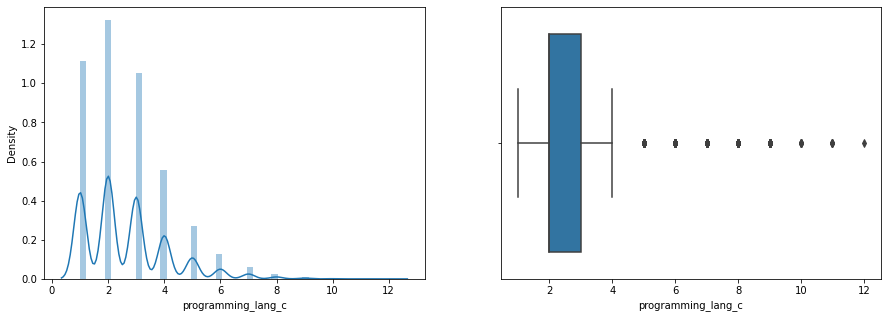

/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


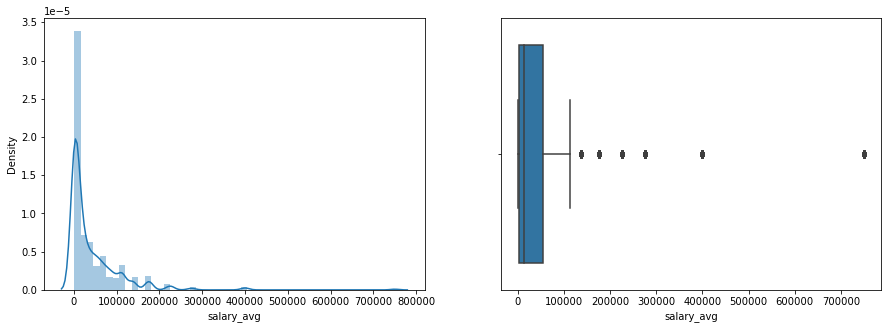

In [94]:
dist_boxplot_num(data)

#### 3.1. Normal distribution

I want to apply boxcox tranformation to columns salary_average, as it is the one with bigger numbers

In [77]:
def boxcox_transform(data, skip_columns=[]):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        if column not in skip_columns:
# since i know any columns should take negative numbers, to avoid -inf in df
            data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
            data[column] = data[column].fillna(data[column].mean())
            transformed_data, ci = stats.boxcox(data[column])
            data[column] = transformed_data
            _ci[column] = [ci] 
        return data, _ci

In [95]:
data, _ci = boxcox_transform(data, skip_columns = ['programming_lang_c'])
data

age gender      country          education                     role  \
0      50-54    Man        India  Bachelor’s degree                    Other   
1      50-54    Man    Indonesia    Master’s degree  Program/Project Manager   
2      22-24    Man     Pakistan    Master’s degree        Software Engineer   
3      45-49    Man       Mexico    Doctoral degree       Research Scientist   
4      45-49    Man        India    Doctoral degree                    Other   
...      ...    ...          ...                ...                      ...   
14370  18-21    Man        India  Bachelor’s degree        Software Engineer   
14371  60-69    Man          USA  Bachelor’s degree  Program/Project Manager   
14372  30-34    Man        India  Bachelor’s degree             Data Analyst   
14373  35-39    Man  South Korea  Bachelor’s degree        Software Engineer   
14374  30-34    Man        Egypt  Bachelor’s degree             Data Analyst   

      experience_prog  programming_lang_c  experience_ml  \
0          5-10 years                   2     5-10 years   
1           20+ years                   4   Under 1 year   
2           1-3 years                   3  No experience   
3           20+ years                   1     5-10 years   
4           < 1 years                   3    10-20 years   
...               ...                 ...            ...   
14370       1-3 years                   4   Under 1 year   
14371       20+ years                   2   Under 1 year   
14372       1-3 years                   2      1-2 years   
14373      5-10 years                   3      3-4 years   
14374       1-3 years                   4      1-2 years   

                        industry              company_size team_size  \
0      Manufacturing/Fabrication          50-249 employees       3-4   
1      Manufacturing/Fabrication      1000-9,999 employees       1-2   
2            Academics/Education      1000-9,999 employees         0   
3            Academics/Education      1000-9,999 employees         0   
4            Academics/Education          50-249 employees       5-9   
...                          ...                       ...       ...   
14370        Academics/Education            0-49 employees       1-2   
14371        Academics/Education  10,000 or more employees       5-9   
14372  Manufacturing/Fabrication  10,000 or more employees       20+   
14373       Computers/Technology  10,000 or more employees       20+   
14374       Computers/Technology  10,000 or more employees       20+   

              salary country_group  salary_avg      role_group  
0        25000-29999         India     27500.0           Other  
1        60000-69999         Other     65000.0    Data Analyst  
2              0-999         Other       500.0   Data Engineer  
3        30000-39999         Other     35000.0  Data Scientist  
4        30000-39999         India     35000.0           Other  
...              ...           ...         ...             ...  
14370          0-999         India       500.0   Data Engineer  
14371  300000-499999           USA    400000.0    Data Analyst  
14372      3000-3999         India      3500.0    Data Analyst  
14373    80000-89999         Other     85000.0   Data Engineer  
14374    15000-19999         Other     17500.0    Data Analyst  

[14375 rows x 15 columns]

#### 3.2. Dealing with outliers

I will remove the outliers from columns salary_avg and programming_lang_c, as we can some outliers in the boxplots

In [96]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
        return data

In [97]:
data = remove_outliers(data, threshold=1.5, skip_columns=['programming_lang_c'])

For column programming_lang_c I will drop the rows that have less than 100 answers

In [98]:
data['programming_lang_c'].value_counts()

2     4187
1     3522
3     3332
4     1758
5      856
6      397
7      198
8       79
9       31
10       8
11       6
12       1
Name: programming_lang_c, dtype: int64

In [99]:
data = data[data['programming_lang_c'] < 8]

In [100]:
data['programming_lang_c'].value_counts()

2    4187
1    3522
3    3332
4    1758
5     856
6     397
7     198
Name: programming_lang_c, dtype: int64

### 3.3 Data distribution (categorical)

In [101]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        order = df[col].value_counts(ascending=True).index
        fig, axes = plt.subplots(1, figsize=(22, 12))
        sns.countplot(y=df[col], data=df, order=order)
        plt.show()

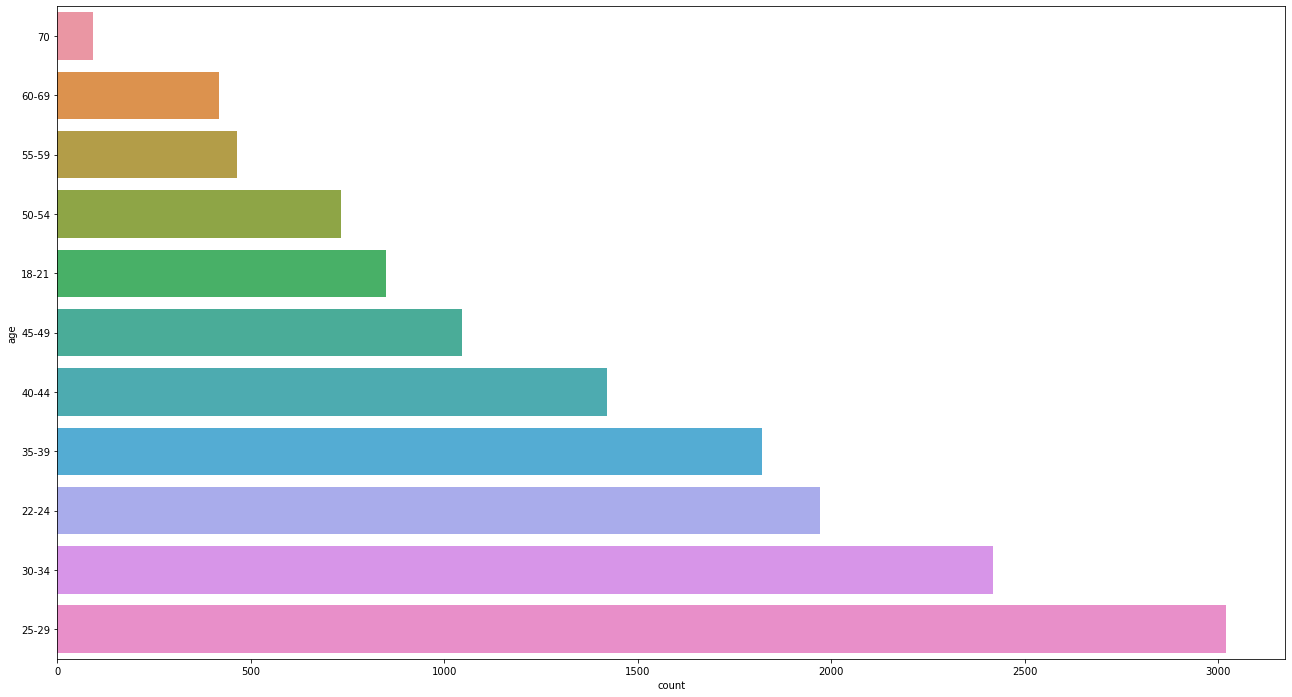

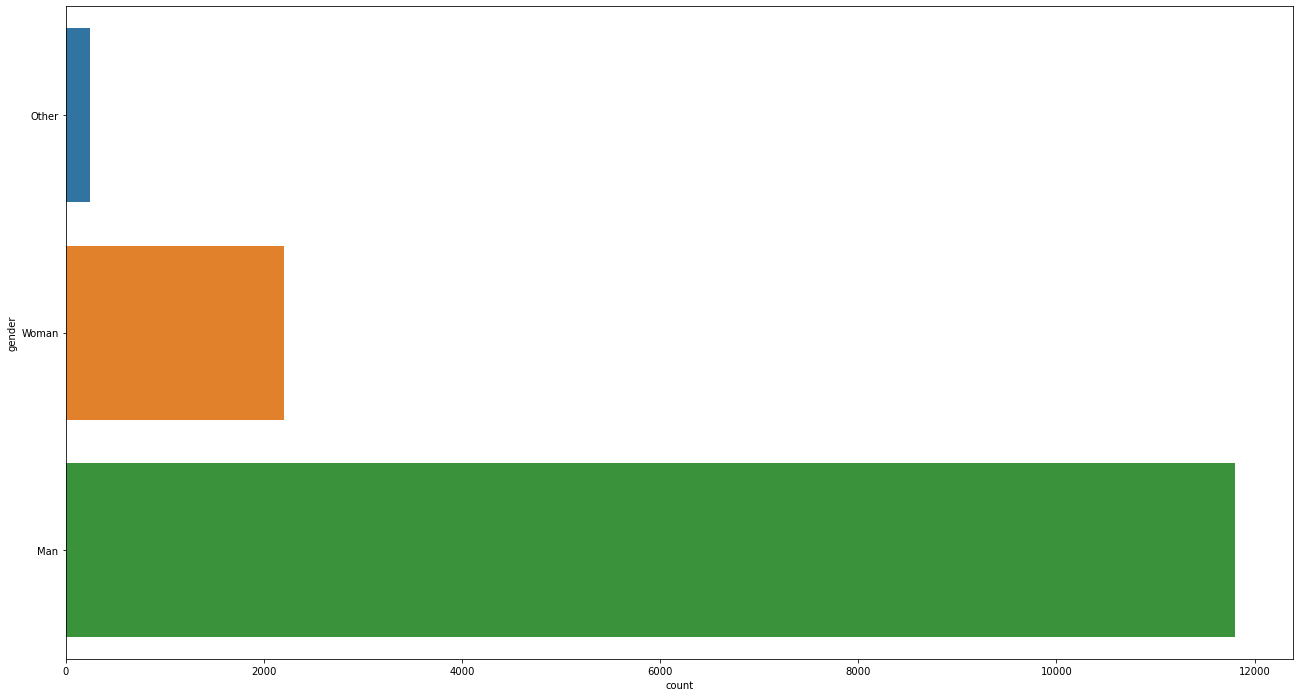

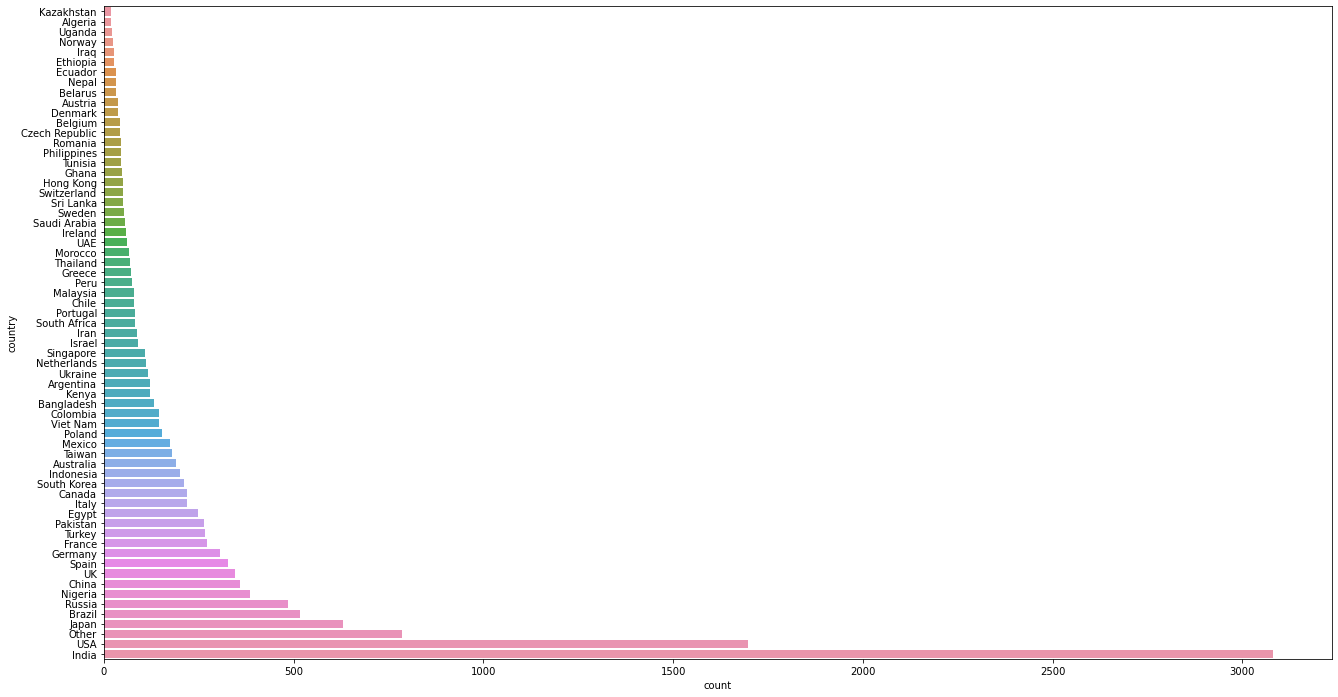

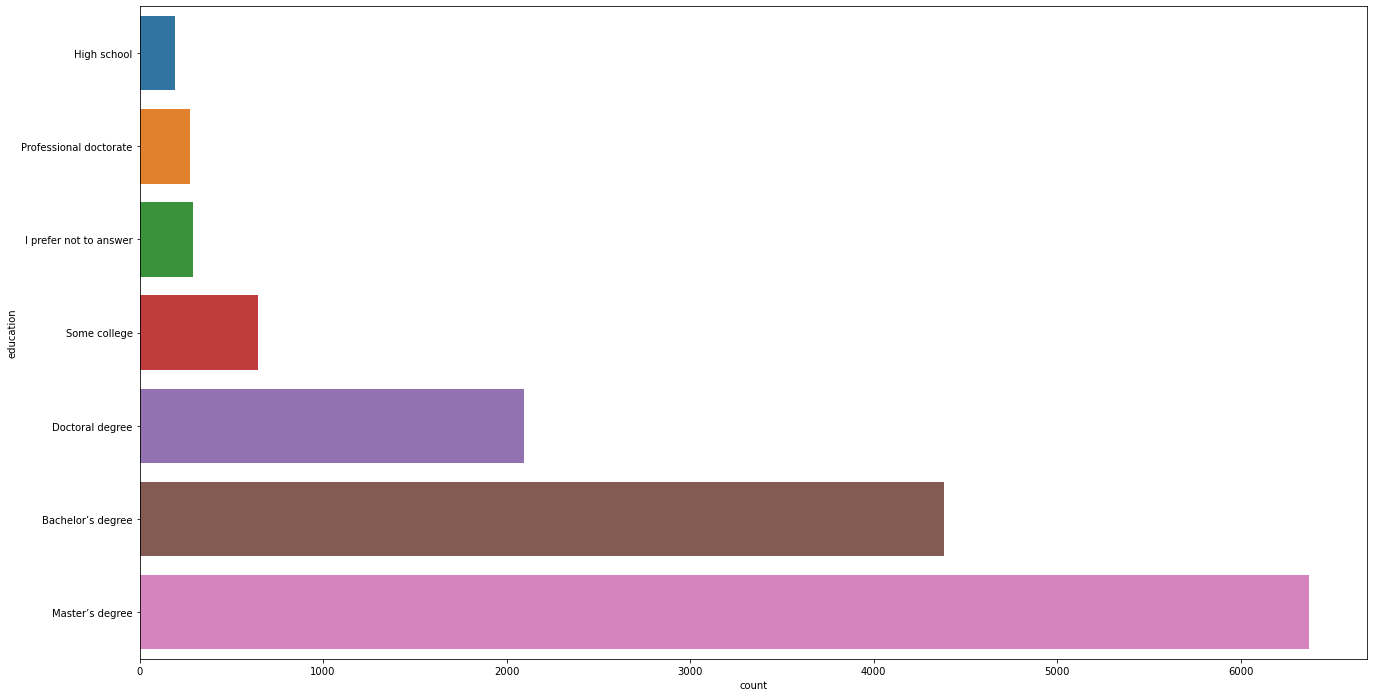

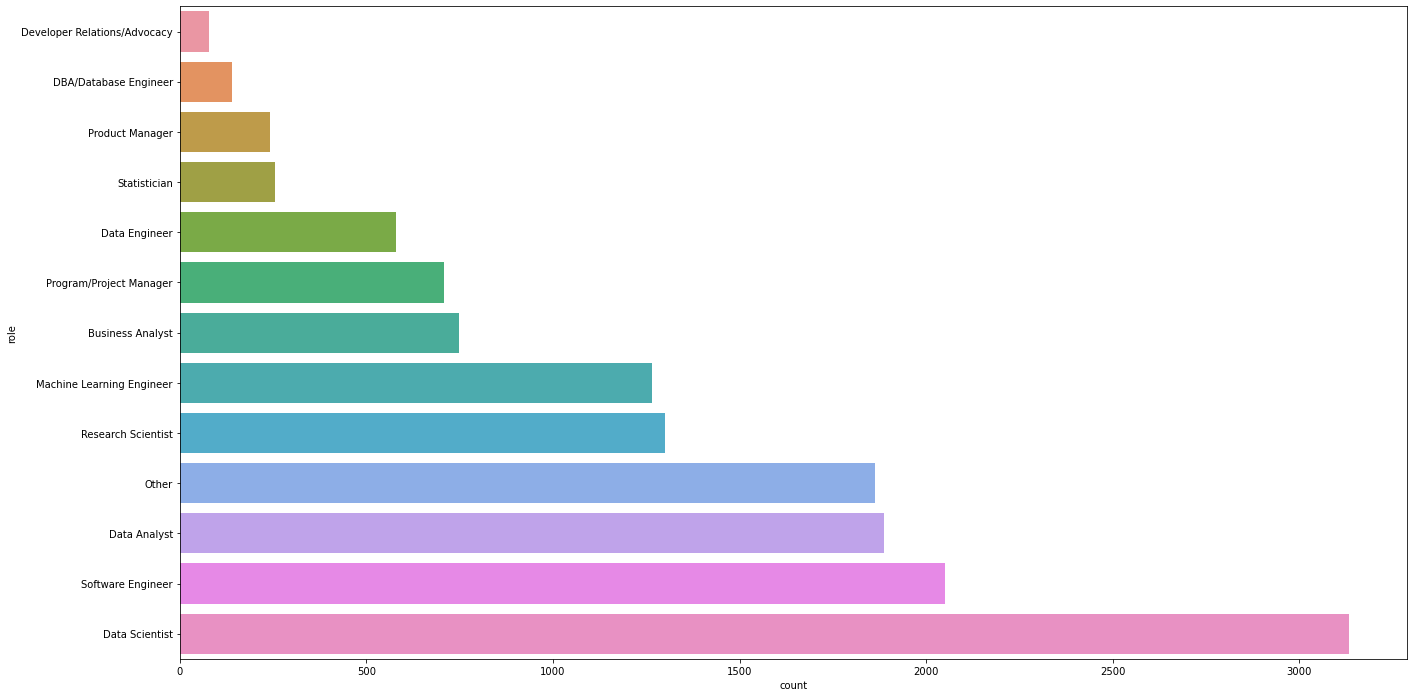

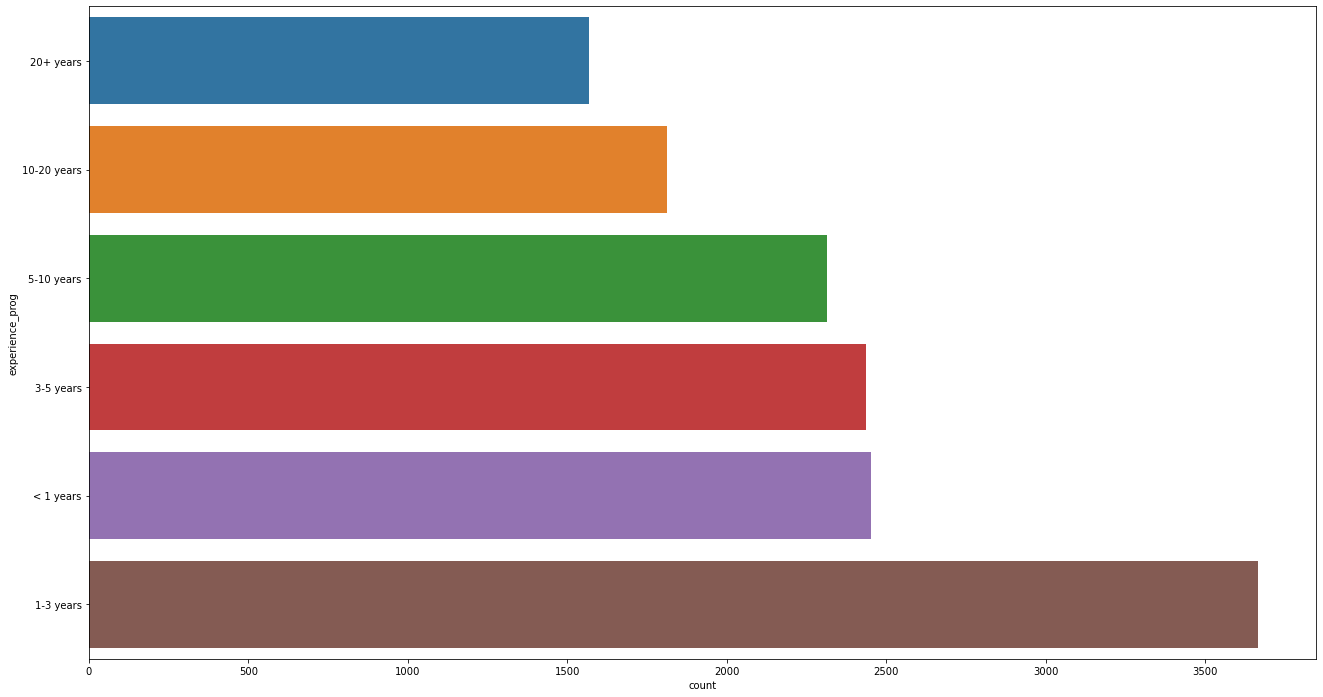

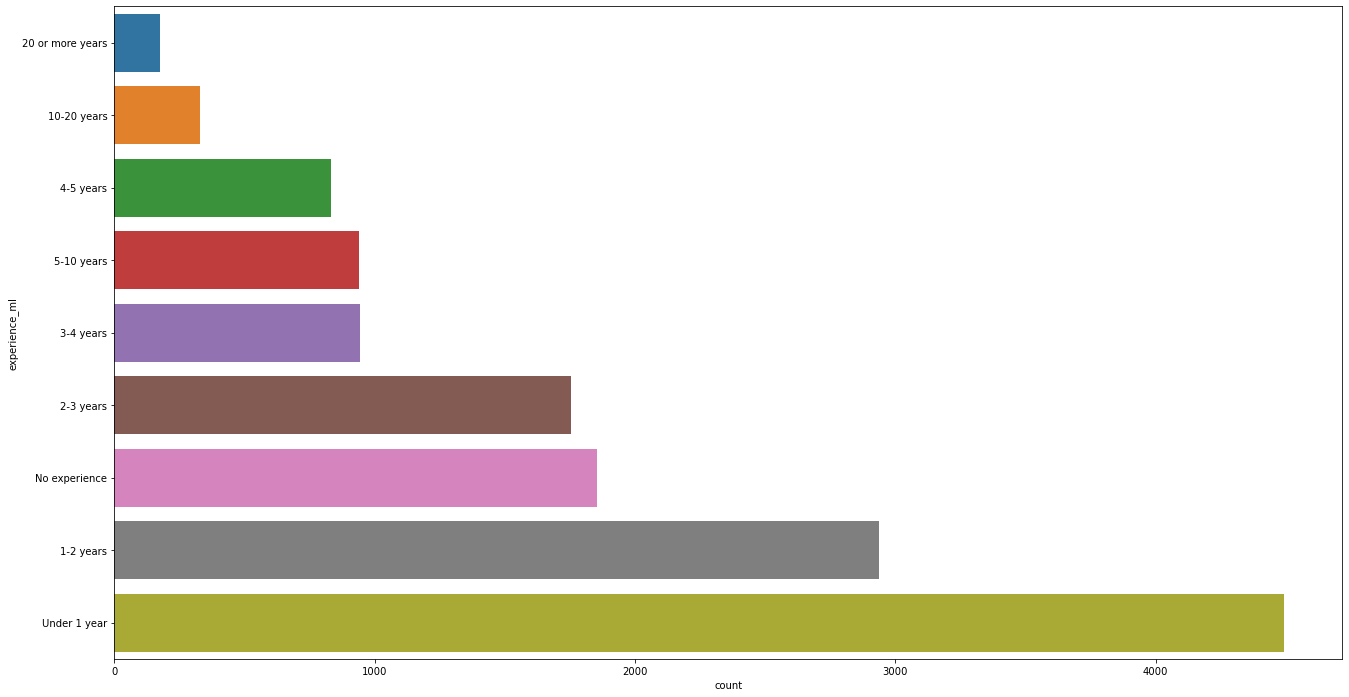

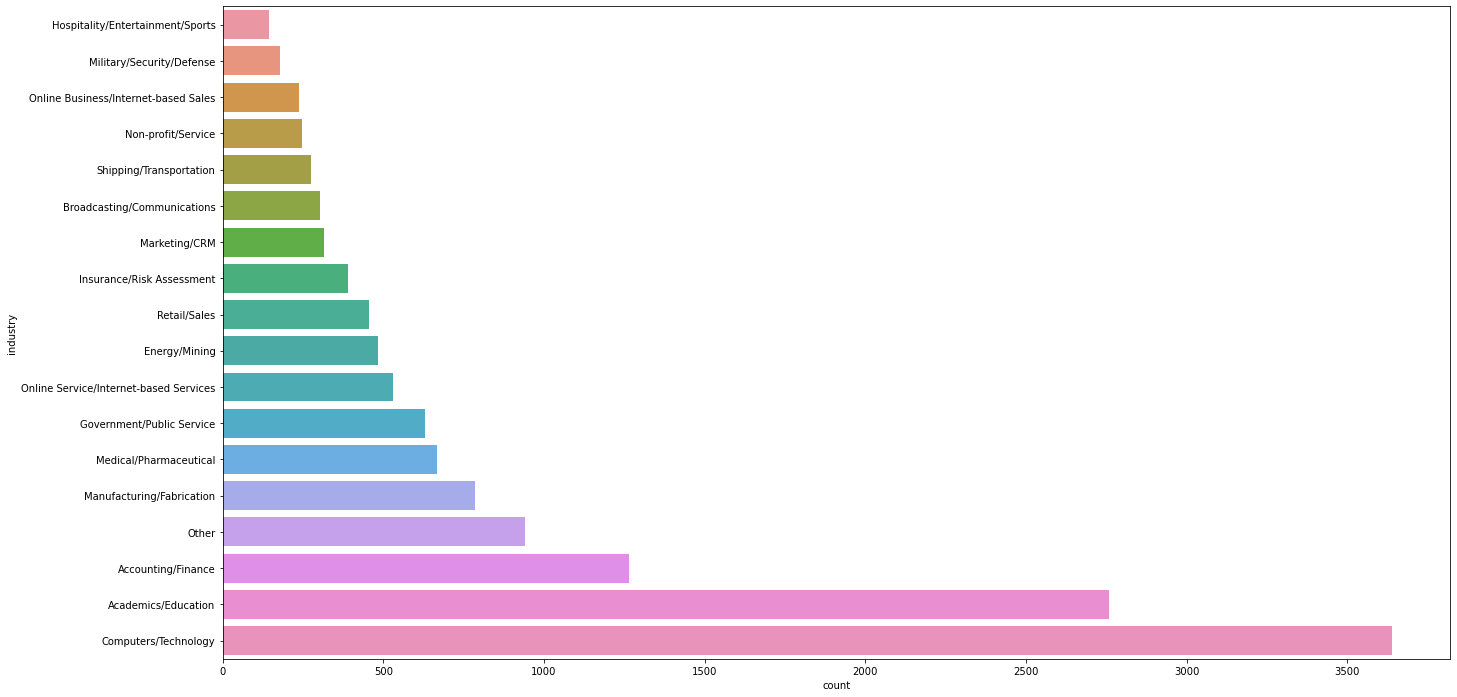

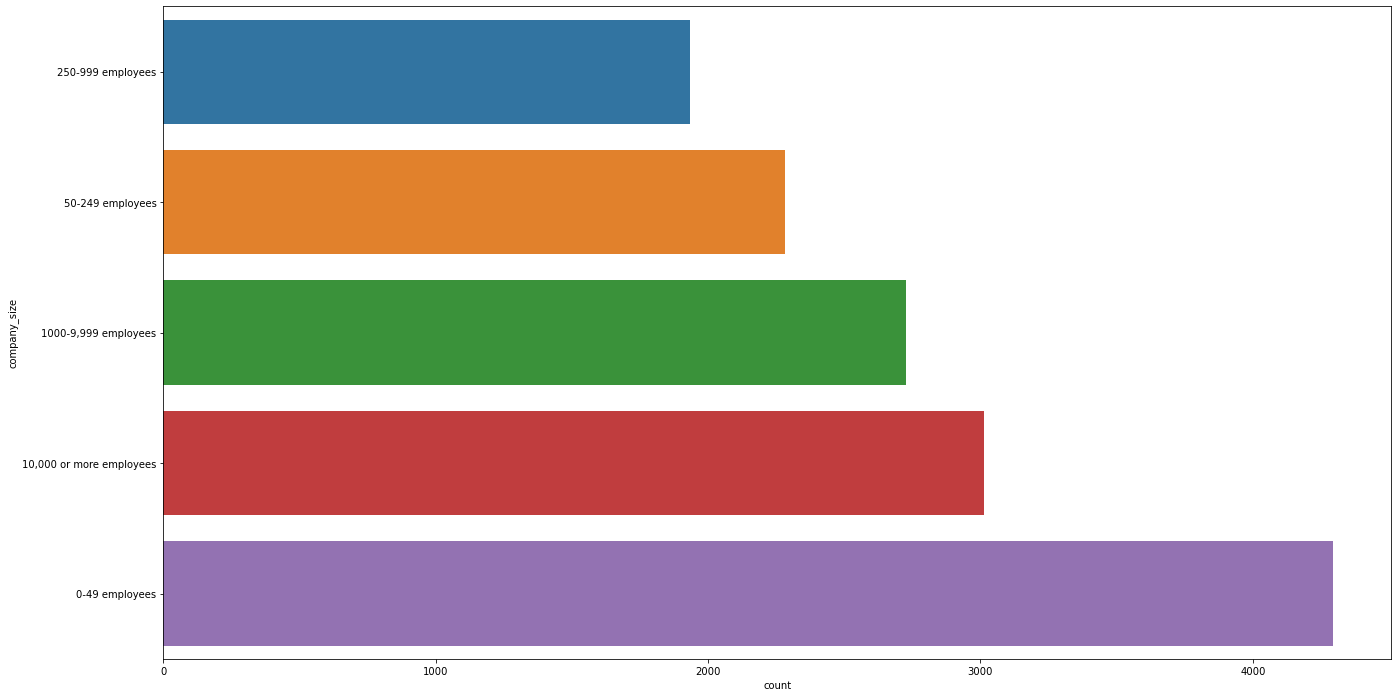

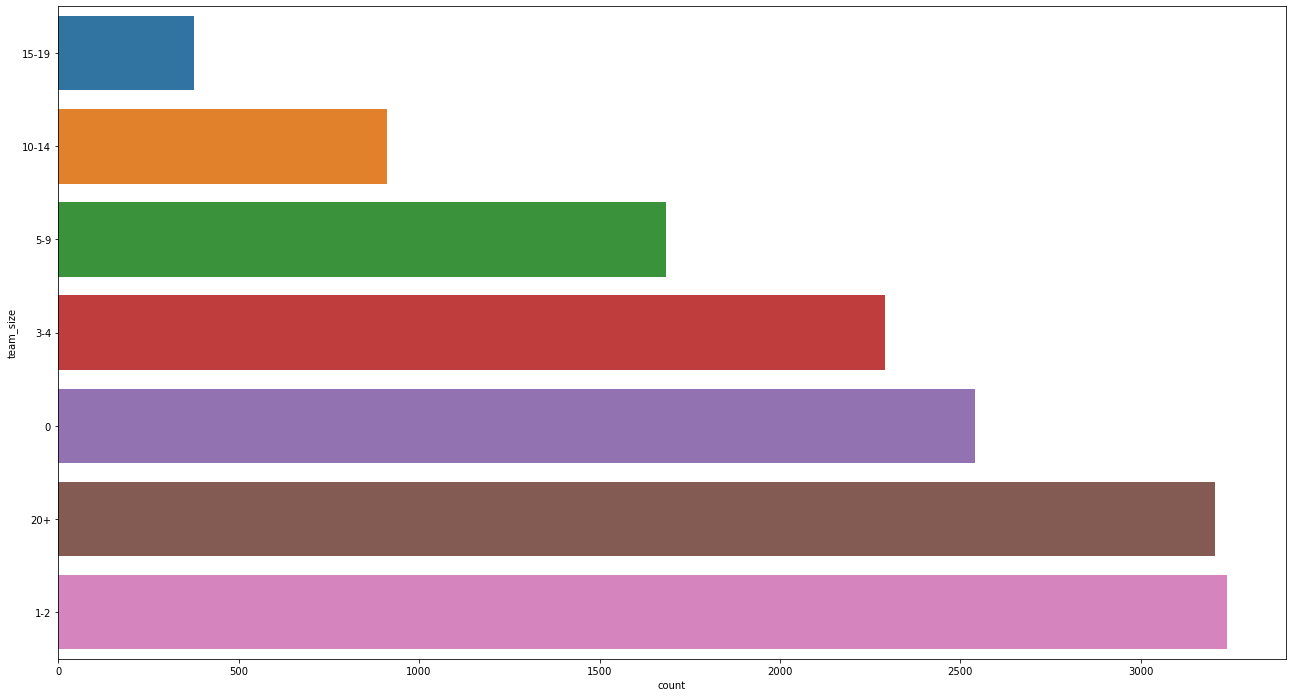

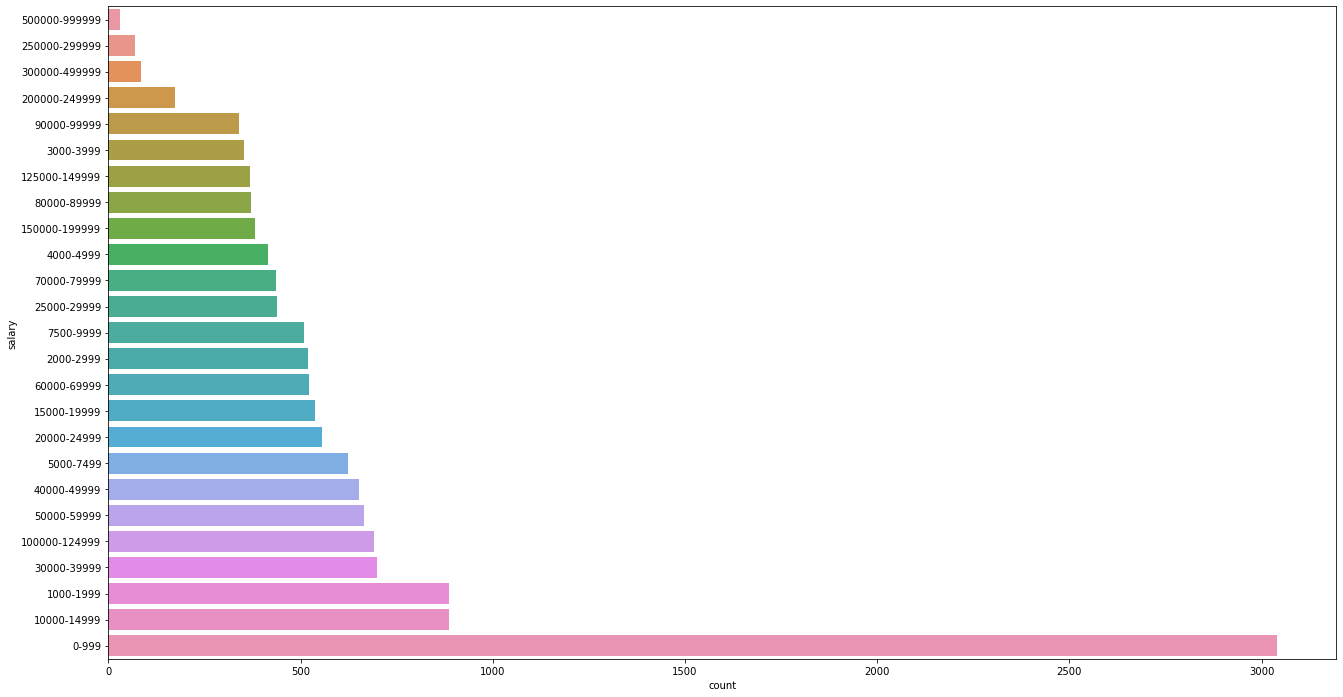

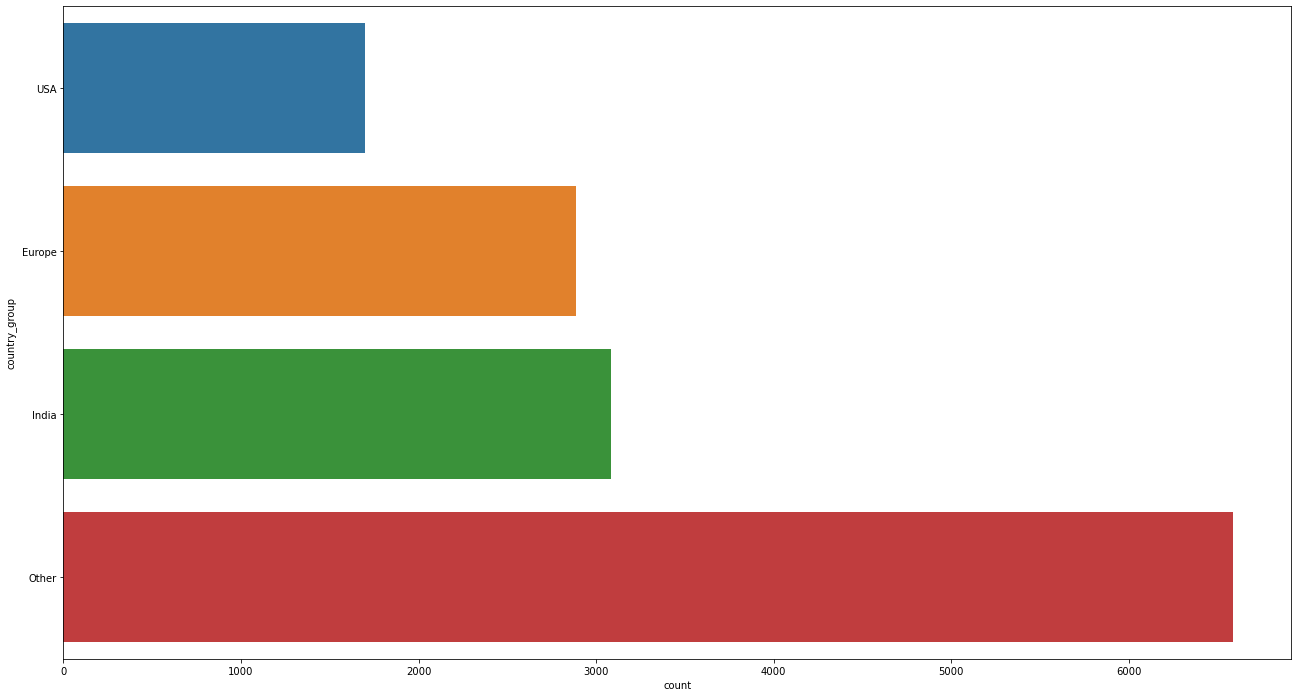

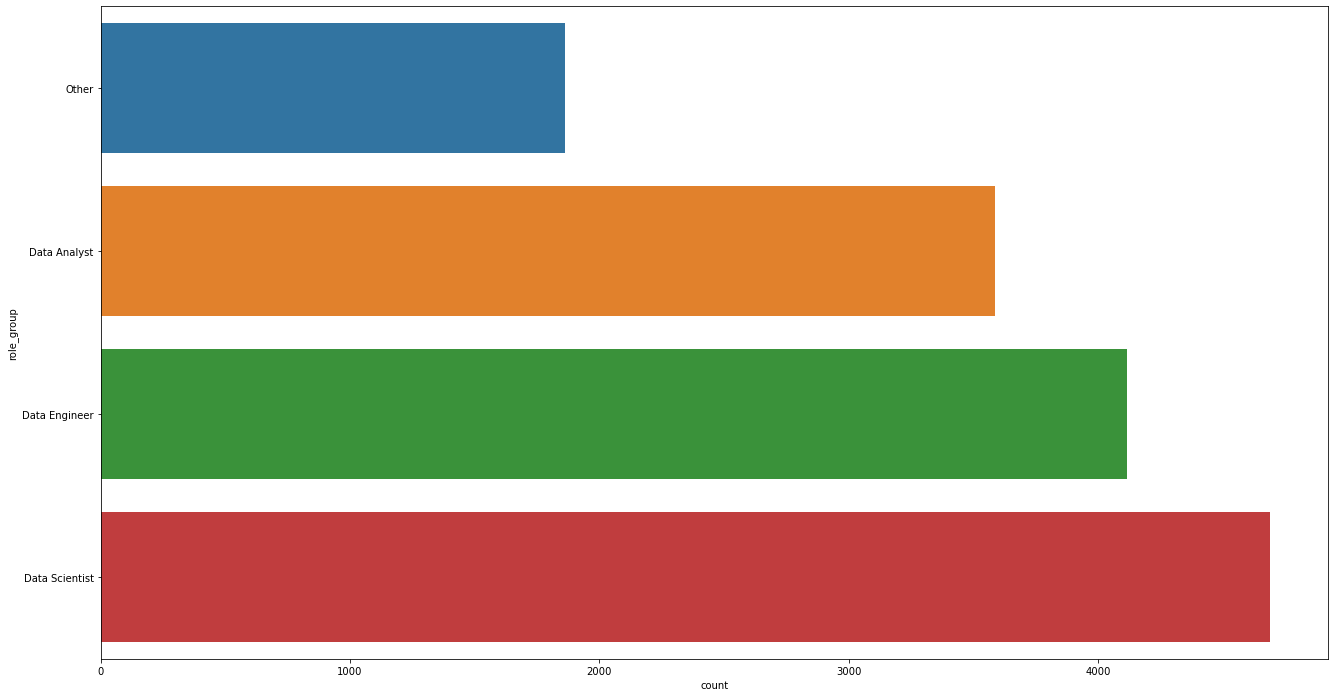

In [102]:
dist_cat(data)

### Data correlation

#### Numerical variables

In [103]:
corr_df_model = data.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

programming_lang_c  salary_avg
programming_lang_c            1.000000    0.034902
salary_avg                    0.034902    1.000000

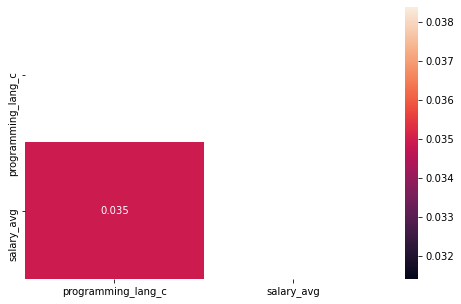

In [106]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns as correlation is not high.

#### Categorical variables

I will apply the same correlation method (spearman) to the categorical variables and will use factorize This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [112]:
data_cat = data.select_dtypes([np.object])

In [113]:
corr_mat = data_cat.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

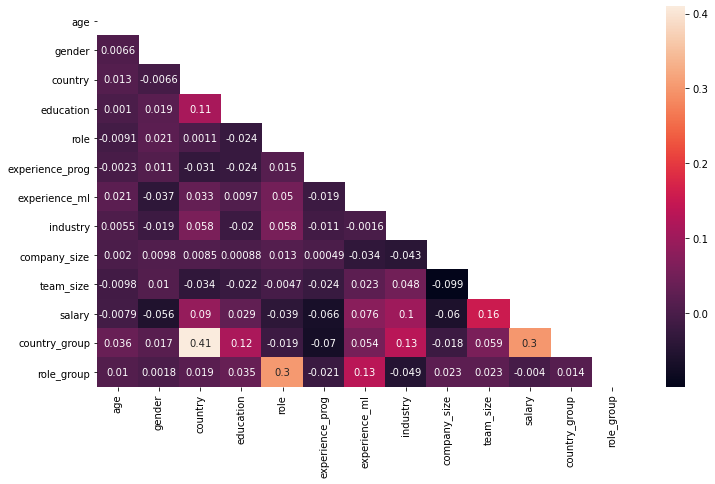

In [114]:
mask = np.zeros_like(corr_mat)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap((corr_mat), mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns as correlation is not high.

### ChiSquare test

H0 (Null Hypothesis) - assumes that there is no association between the two variables.

Ha (Alternate Hypothesis) - assumes that there is an association between the two variables.

In [115]:
def col_cat_val(data, columns=[]):
    for i in columns:
        for j in columns:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                print (i,"vs", j)
                print (chi2_contingency(data_crosstab, correction=False), '\n')

In [117]:
col_cat_val(data, columns= data.select_dtypes(np.object))

age vs gender
(117.01803760226646, 1.0141811545968663e-15, 20, array([[7.02972000e+02, 1.44776842e+01, 1.31550316e+02],
       [1.63198800e+03, 3.36107368e+01, 3.05401263e+02],
       [2.50138800e+03, 5.15160000e+01, 4.68096000e+02],
       [2.00210400e+03, 4.12332632e+01, 3.74662737e+02],
       [1.50778800e+03, 3.10528421e+01, 2.82159158e+02],
       [1.17576000e+03, 2.42147368e+01, 2.20025263e+02],
       [8.65260000e+02, 1.78200000e+01, 1.61920000e+02],
       [6.06924000e+02, 1.24995789e+01, 1.13576421e+02],
       [3.83364000e+02, 7.89536842e+00, 7.17406316e+01],
       [3.46104000e+02, 7.12800000e+00, 6.47680000e+01],
       [7.53480000e+01, 1.55178947e+00, 1.41002105e+01]])) 

age vs country
(3820.7175004158053, 0.0, 640, array([[1.13200000e+00, 7.20905263e+00, 1.13200000e+01, 2.14484211e+00,
        7.92400000e+00, 1.96610526e+00, 2.56189474e+00, 3.08023158e+01,
        1.30477895e+01, 4.64715789e+00, 2.13888421e+01, 8.63894737e+00,
        2.56189474e+00, 2.26400000e+00, 1.90

age vs experience_ml
(2137.900109209167, 0.0, 80, array([[174.98336842,  19.54189474, 104.38231579,  10.36673684,
         56.30210526,  49.45052632,  55.94463158, 110.45936842,
        267.56905263],
       [406.23347368,  45.36757895, 242.32926316,  24.06694737,
        130.70842105, 114.80210526, 129.87852632, 256.43747368,
        621.17621053],
       [622.644     ,  69.536     , 371.424     ,  36.888     ,
        200.34      , 175.96      , 199.068     , 393.048     ,
        952.092     ],
       [498.36252632,  55.65642105, 297.28673684,  29.52505263,
        160.35157895, 140.83789474, 159.33347368, 314.59452632,
        762.05178947],
       [375.31768421,  41.91494737, 223.88715789,  22.23536842,
        120.76105263, 106.06526316, 119.99431579, 236.92168421,
        573.90252632],
       [292.66947368,  32.68491228, 174.58526316,  17.33894737,
         94.16842105,  82.70877193,  93.57052632, 184.74947368,
        447.52421053],
       [215.38      ,  24.05333333, 128.48  

       [  18.44266667,   19.67515789,   42.04519298,   10.83698246]])) 

age vs role_group
(547.1266983298294, 2.47784681278457e-96, 30, array([[213.59052632, 245.10778947, 279.36568421, 110.936     ],
       [495.86210526, 569.03115789, 648.56273684, 257.544     ],
       [760.02      , 872.168     , 994.068     , 394.744     ],
       [608.31789474, 698.08084211, 795.64926316, 315.952     ],
       [458.12526316, 525.72589474, 599.20484211, 237.944     ],
       [357.24210526, 409.95649123, 467.25473684, 185.54666667],
       [262.9       , 301.69333333, 343.86      , 136.54666667],
       [184.40736842, 211.61838596, 241.19557895,  95.77866667],
       [116.48105263, 133.66891228, 152.35136842,  60.49866667],
       [105.16      , 120.67733333, 137.544     ,  54.61866667],
       [ 22.89368421,  26.27185965,  29.94378947,  11.89066667]])) 

gender vs age
(117.01803760226649, 1.0141811545968517e-15, 20, array([[7.02972000e+02, 1.63198800e+03, 2.50138800e+03, 2.00210400e+03,
        1

country vs education
(2300.919616466158, 6.308590916282474e-270, 384, array([[5.84400000e+00, 2.79200000e+00, 2.54666667e-01, 3.88000000e-01,
        8.49466667e+00, 3.64000000e-01, 8.62666667e-01],
       [3.72170526e+01, 1.77806316e+01, 1.62182456e+00, 2.47094737e+00,
        5.40976140e+01, 2.31810526e+00, 5.49382456e+00],
       [5.84400000e+01, 2.79200000e+01, 2.54666667e+00, 3.88000000e+00,
        8.49466667e+01, 3.64000000e+00, 8.62666667e+00],
       [1.10728421e+01, 5.29010526e+00, 4.82526316e-01, 7.35157895e-01,
        1.60951579e+01, 6.89684211e-01, 1.63452632e+00],
       [4.09080000e+01, 1.95440000e+01, 1.78266667e+00, 2.71600000e+00,
        5.94626667e+01, 2.54800000e+00, 6.03866667e+00],
       [1.01501053e+01, 4.84926316e+00, 4.42315789e-01, 6.73894737e-01,
        1.47538947e+01, 6.32210526e-01, 1.49831579e+00],
       [1.32258947e+01, 6.31873684e+00, 5.76350877e-01, 8.78105263e-01,
        1.92247719e+01, 8.23789474e-01, 1.95235088e+00],
       [1.59018316e+02, 7.5

country vs team_size
(1293.3509017081299, 7.554893416682754e-99, 384, array([[3.38666667e+00, 4.32000000e+00, 1.21466667e+00, 5.02666667e-01,
        4.27466667e+00, 3.05466667e+00, 2.24666667e+00],
       [2.15677193e+01, 2.75115789e+01, 7.73550877e+00, 3.20119298e+00,
        2.72228772e+01, 1.94534035e+01, 1.43077193e+01],
       [3.38666667e+01, 4.32000000e+01, 1.21466667e+01, 5.02666667e+00,
        4.27466667e+01, 3.05466667e+01, 2.24666667e+01],
       [6.41684211e+00, 8.18526316e+00, 2.30147368e+00, 9.52421053e-01,
        8.09936842e+00, 5.78778947e+00, 4.25684211e+00],
       [2.37066667e+01, 3.02400000e+01, 8.50266667e+00, 3.51866667e+00,
        2.99226667e+01, 2.13826667e+01, 1.57266667e+01],
       [5.88210526e+00, 7.50315789e+00, 2.10968421e+00, 8.73052632e-01,
        7.42442105e+00, 5.30547368e+00, 3.90210526e+00],
       [7.66456140e+00, 9.77684211e+00, 2.74898246e+00, 1.13761404e+00,
        9.67424561e+00, 6.91319298e+00, 5.08456140e+00],
       [9.21529825e+01, 1.1

        6.62891228e+00]])) 

education vs role
(2960.146334441345, 0.0, 72, array([[2.29761474e+02, 4.30610526e+01, 5.80709053e+02, 1.78395789e+02,
        9.63644842e+02, 2.39911579e+01, 3.89087368e+02, 5.72712000e+02,
        7.44341053e+01, 2.17765895e+02, 4.00160211e+02, 6.30844421e+02,
        7.84326316e+01],
       [1.09769684e+02, 2.05726316e+01, 2.77436632e+02, 8.52294737e+01,
        4.60386105e+02, 1.14618947e+01, 1.85888421e+02, 2.73616000e+02,
        3.55612632e+01, 1.04038737e+02, 1.91178526e+02, 3.01389053e+02,
        3.74715789e+01],
       [1.00124211e+01, 1.87649123e+00, 2.53058246e+01, 7.77403509e+00,
        4.19931930e+01, 1.04547368e+00, 1.69554386e+01, 2.49573333e+01,
        3.24364912e+00, 9.48968421e+00, 1.74379649e+01, 2.74905965e+01,
        3.41789474e+00],
       [1.52545263e+01, 2.85894737e+00, 3.85549474e+01, 1.18442105e+01,
        6.39791579e+01, 1.59284211e+00, 2.58326316e+01, 3.80240000e+01,
        4.94189474e+00, 1.44581053e+01, 2.65677895e+01, 4

education vs role_group
(1317.0839389018836, 8.857347044864836e-269, 18, array([[1102.67052632, 1265.37978947, 1442.23768421,  572.712     ],
       [ 526.80631579,  604.54147368,  689.03621053,  273.616     ],
       [  48.05157895,   55.14203509,   62.84905263,   24.95733333],
       [  73.20947368,   84.01221053,   95.75431579,   38.024     ],
       [1602.80947368, 1839.31887719, 2096.39431579,  832.47733333],
       [  68.68105263,   78.81557895,   89.83136842,   35.672     ],
       [ 162.77157895,  186.79003509,  212.89705263,   84.54133333]])) 

role vs age
(1721.8429898016377, 1.4393396511608107e-281, 120, array([[4.45054737e+01, 1.03321895e+02, 1.58364000e+02, 1.26754105e+02,
        9.54587368e+01, 7.44378947e+01, 5.47800000e+01, 3.84246316e+01,
        2.42709474e+01, 2.19120000e+01, 4.77031579e+00],
       [8.34105263e+00, 1.93642105e+01, 2.96800000e+01, 2.37557895e+01,
        1.78905263e+01, 1.39508772e+01, 1.02666667e+01, 7.20140351e+00,
        4.54877193e+00, 4.106666

(2960.146334441346, 0.0, 72, array([[2.29761474e+02, 1.09769684e+02, 1.00124211e+01, 1.52545263e+01,
        3.33974526e+02, 1.43109474e+01, 3.39164211e+01],
       [4.30610526e+01, 2.05726316e+01, 1.87649123e+00, 2.85894737e+00,
        6.25922807e+01, 2.68210526e+00, 6.35649123e+00],
       [5.80709053e+02, 2.77436632e+02, 2.53058246e+01, 3.85549474e+01,
        8.44101614e+02, 3.61701053e+01, 8.57218246e+01],
       [1.78395789e+02, 8.52294737e+01, 7.77403509e+00, 1.18442105e+01,
        2.59310877e+02, 1.11115789e+01, 2.63340351e+01],
       [9.63644842e+02, 4.60386105e+02, 4.19931930e+01, 6.39791579e+01,
        1.40072582e+03, 6.00216842e+01, 1.42249193e+02],
       [2.39911579e+01, 1.14618947e+01, 1.04547368e+00, 1.59284211e+00,
        3.48728421e+01, 1.49431579e+00, 3.54147368e+00],
       [3.89087368e+02, 1.85888421e+02, 1.69554386e+01, 2.58326316e+01,
        5.65565965e+02, 2.42347368e+01, 5.74354386e+01],
       [5.72712000e+02, 2.73616000e+02, 2.49573333e+01, 3.80240000e+

role vs country_group
(364.51707630601214, 5.874965813422429e-56, 36, array([[ 151.392     ,  161.50926316,  345.14021053,   88.95852632],
       [  28.37333333,   30.26947368,   64.68491228,   16.6722807 ],
       [ 382.63466667,  408.20547368,  872.32224561,  224.83761404],
       [ 117.54666667,  125.40210526,  267.98035088,   69.07087719],
       [ 634.95466667,  677.38757895, 1447.55592982,  373.10182456],
       [  15.808     ,   16.86442105,   36.03873684,    9.28884211],
       [ 256.37333333,  273.50631579,  584.47438596,  150.64596491],
       [ 377.36533333,  402.584     ,  860.30933333,  221.74133333],
       [  49.04533333,   52.32294737,  111.81249123,   28.81922807],
       [ 143.488     ,  153.07705263,  327.12084211,   84.31410526],
       [ 263.66933333,  281.28989474,  601.10764912,  154.93312281],
       [ 415.66933333,  443.44778947,  947.63396491,  244.24891228],
       [  51.68      ,   55.13368421,  117.81894737,   30.36736842]])) 

role vs role_group
(42750.0, 

experience_prog vs role
(1450.0737902949495, 1.3870224077011792e-263, 60, array([[192.17557895,  36.01684211, 485.71284211, 149.21263158,
        806.00547368,  20.06652632, 325.43789474, 479.024     ,
         62.25768421, 182.14231579, 334.69936842, 527.64673684,
         65.60210526],
       [ 94.98694737,  17.80210526, 240.07410526,  73.75157895,
        398.38568421,   9.91831579, 160.85473684, 236.768     ,
         30.77221053,  90.02778947, 165.43242105, 260.80084211,
         32.42526316],
       [ 82.14378947,  15.39508772, 207.61375439,  63.77964912,
        344.52007018,   8.57726316, 139.10561404, 204.75466667,
         26.61150877,  77.85515789, 143.06435088, 225.53803509,
         28.04105263],
       [127.75010526,  23.94245614, 322.88112281,  99.19017544,
        535.79796491,  13.33936842, 216.33719298, 318.43466667,
         41.38624561, 121.08042105, 222.49382456, 350.75698246,
         43.60947368],
       [121.35473684,  22.74385965, 306.71719298,  94.2245614 ,
  

experience_ml vs gender
(133.7673731873383, 1.1879261401730766e-20, 16, array([[2.43183600e+03, 5.00835789e+01, 4.55080421e+02],
       [2.71584000e+02, 5.59326316e+00, 5.08227368e+01],
       [1.45065600e+03, 2.98762105e+01, 2.71467789e+02],
       [1.44072000e+02, 2.96715789e+00, 2.69608421e+01],
       [7.82460000e+02, 1.61147368e+01, 1.46425263e+02],
       [6.87240000e+02, 1.41536842e+01, 1.28606316e+02],
       [7.77492000e+02, 1.60124211e+01, 1.45495579e+02],
       [1.53511200e+03, 3.16155789e+01, 2.87272421e+02],
       [3.71854800e+03, 7.65833684e+01, 6.95868632e+02]])) 

experience_ml vs country
(1743.7113053188482, 6.252982600128852e-134, 512, array([[3.91600000e+00, 2.49387368e+01, 3.91600000e+01, 7.41978947e+00,
        2.74120000e+01, 6.80147368e+00, 8.86252632e+00, 1.06556421e+02,
        4.51370526e+01, 1.60762105e+01, 7.39917895e+01, 2.98852632e+01,
        8.86252632e+00, 7.83200000e+00, 6.59536842e+00, 5.09080000e+01,
        5.35873684e+00, 5.60606316e+01, 6.327431

experience_ml vs company_size
(273.0587275363321, 4.656439733319699e-40, 32, array([[ 884.80989474,  620.99515789,  561.63684211,  398.81368421,
         470.74442105],
       [  98.81431579,   69.35185965,   62.72280702,   44.53894737,
          52.57207018],
       [ 527.81305263,  370.44042105,  335.03157895,  237.90315789,
         280.81178947],
       [  52.41978947,   36.79031579,   33.27368421,   23.62736842,
          27.88884211],
       [ 284.69368421,  199.80947368,  180.71052632,  128.32105263,
         151.46526316],
       [ 250.04842105,  175.49403509,  158.71929825,  112.70526316,
         133.03298246],
       [ 282.88610526,  198.54084211,  179.56315789,  127.50631579,
         150.50357895],
       [ 558.54189474,  392.00715789,  354.53684211,  251.75368421,
         297.16042105],
       [1352.97284211,  949.57073684,  858.80526316,  609.83052632,
         719.82063158]])) 

experience_ml vs team_size
(1481.3165636273902, 8.681463922593839e-279, 48, array([[ 523.50

industry vs country
(3334.011173125562, 5.895431886431411e-226, 1088, array([[ 3.67866667, 23.42729825, 36.78666667, ...,  4.06589474,
        22.26561404, 28.26764912],
       [ 1.68666667, 10.74140351, 16.86666667, ...,  1.86421053,
        10.20877193, 12.96070175],
       [ 0.40266667,  2.56435088,  4.02666667, ...,  0.44505263,
         2.43719298,  3.09417544],
       ...,
       [ 1.256     ,  7.99873684, 12.56      , ...,  1.38821053,
         7.60210526,  9.65136842],
       [ 0.608     ,  3.872     ,  6.08      , ...,  0.672     ,
         3.68      ,  4.672     ],
       [ 0.368     ,  2.34357895,  3.68      , ...,  0.40673684,
         2.22736842,  2.82778947]])) 

industry vs education
(1680.4162055318884, 7.330547710517304e-284, 102, array([[ 848.61031579,  405.42778947,   36.9802807 ,   56.34168421,
        1233.51501754,   52.85663158,  125.2682807 ],
       [ 389.08736842,  185.88842105,   16.9554386 ,   25.83263158,
         565.56596491,   24.23473684,   57.4354386 ]

industry vs team_size
(694.2437734229912, 7.164871790387679e-89, 102, array([[491.77964912, 627.30947368, 176.38238596,  72.99249123,
        620.72659649, 443.56975439, 326.23964912],
       [225.48070175, 287.62105263,  80.87122807,  33.46701754,
        284.60280702, 203.37649123, 149.58070175],
       [ 53.83017544,  68.66526316,  19.30680702,   7.98975439,
         67.94470175,  48.55312281,  35.71017544],
       [648.45754386, 827.16631579, 232.57670175,  96.2474386 ,
        818.48617544, 584.8882807 , 430.17754386],
       [ 86.09263158, 109.81894737,  30.87810526,  12.77831579,
        108.66652632,  77.65284211,  57.11263158],
       [112.29473684, 143.24210526,  40.27578947,  16.66736842,
        141.73894737, 101.28631579,  74.49473684],
       [ 26.02385965,  33.19578947,   9.33375439,   3.86259649,
         32.8474386 ,  23.47270175,  17.26385965],
       [ 69.51578947,  88.67368421,  24.93263158,  10.31789474,
         87.74315789,  62.70105263,  46.11578947],
       [13

         23.40098246]])) 

company_size vs education
(323.61570567511075, 2.8572666277934145e-54, 24, array([[1320.43642105,  630.84505263,   57.54126316,   87.66757895,
        1919.34757895,   82.24484211,  194.91726316],
       [ 926.73536842,  442.75242105,   40.38477193,   61.52863158,
        1347.07529825,   57.72273684,  136.80077193],
       [ 838.15263158,  400.43157895,   36.5245614 ,   55.64736842,
        1218.31403509,   52.20526316,  123.7245614 ],
       [ 595.16526316,  284.34315789,   25.93578947,   39.51473684,
         865.11473684,   37.07052632,   87.85578947],
       [ 702.51031579,  335.62778947,   30.61361404,   46.64168421,
        1021.14835088,   43.75663158,  103.70161404]])) 

company_size vs role
(457.70112818309974, 3.269120118017902e-68, 48, array([[225.04357895,  42.17684211, 568.78484211, 174.73263158,
        943.85747368,  23.49852632, 381.09789474, 560.952     ,
         72.90568421, 213.29431579, 391.94336842, 617.89073684,
         76.82210526],


team_size vs country
(1293.35090170813, 7.554893416681895e-99, 384, array([[3.38666667e+00, 2.15677193e+01, 3.38666667e+01, 6.41684211e+00,
        2.37066667e+01, 5.88210526e+00, 7.66456140e+00, 9.21529825e+01,
        3.90357895e+01, 1.39031579e+01, 6.39901754e+01, 2.58456140e+01,
        7.66456140e+00, 6.77333333e+00, 5.70385965e+00, 4.40266667e+01,
        4.63438596e+00, 4.84828070e+01, 5.47214035e+01, 8.37754386e+00,
        1.28336842e+01, 8.73403509e+00, 5.49174737e+02, 3.58273684e+01,
        1.56856140e+01, 4.63438596e+00, 1.03382456e+01, 1.58638596e+01,
        3.92140351e+01, 1.12116491e+02, 3.20842105e+00, 2.17459649e+01,
        1.39031579e+01, 3.11929825e+01, 1.17642105e+01, 5.88210526e+00,
        1.97852632e+01, 6.84463158e+01, 4.45614035e+00, 1.40101053e+02,
        4.70568421e+01, 1.31901754e+01, 8.19929825e+00, 2.72715789e+01,
        1.44378947e+01, 7.84280702e+00, 8.62708772e+01, 9.80350877e+00,
        1.94287719e+01, 1.46161404e+01, 3.76098246e+01, 5.82863158e+

team_size vs salary
(1521.1440025723018, 2.29918092242624e-228, 144, array([[542.04491228, 157.92561404, 158.10385965, 122.98947368,
         65.77263158,  95.71789474,  67.91157895,  92.6877193 ,
         98.92631579,  31.01473684,  78.24982456,  12.47719298,
         63.09894737, 124.59368421,  15.15087719,  73.97192982,
        116.39438596, 111.22526316, 118.53333333,   5.34736842,
         92.86596491,  77.71508772,  90.54877193,  66.12912281,
         60.60350877],
       [691.42736842, 201.44842105, 201.67578947, 156.88421053,
         83.89894737, 122.09684211,  86.62736842, 118.23157895,
        126.18947368,  39.56210526,  99.81473684,  15.91578947,
         80.48842105, 158.93052632,  19.32631579,  94.35789474,
        148.47157895, 141.87789474, 151.2       ,   6.82105263,
        118.45894737,  99.13263158, 115.50315789,  84.35368421,
         77.30526316],
       [194.41059649,  56.64182456,  56.70575439,  44.11157895,
         23.59010526,  34.33031579,  24.35726316,  33

salary vs country
(11116.741806971157, 0.0, 1536, array([[ 4.05466667, 25.82182456, 40.54666667, ...,  4.48147368,
        24.54140351, 31.15691228],
       [ 1.18133333,  7.52322807, 11.81333333, ...,  1.30568421,
         7.15017544,  9.07761404],
       [ 1.18266667,  7.5317193 , 11.82666667, ...,  1.30715789,
         7.15824561,  9.08785965],
       ...,
       [ 0.67733333,  4.31354386,  6.77333333, ...,  0.74863158,
         4.09964912,  5.20477193],
       [ 0.49466667,  3.15024561,  4.94666667, ...,  0.54673684,
         2.99403509,  3.80112281],
       [ 0.45333333,  2.88701754,  4.53333333, ...,  0.50105263,
         2.74385965,  3.48350877]])) 

salary vs education
(895.2703203400201, 9.021144022750372e-109, 144, array([[9.35347579e+02, 4.46866947e+02, 4.07600702e+01, 6.21004211e+01,
        1.35959375e+03, 5.82591579e+01, 1.38072070e+02],
       [2.72514947e+02, 1.30195368e+02, 1.18755088e+01, 1.80930526e+01,
        3.96119719e+02, 1.69738947e+01, 4.02275088e+01],
       

        1.08800000e+01, 6.58526316e+00]])) 

salary vs company_size
(1915.3555712046432, 0.0, 96, array([[916.14126316, 642.98477193, 581.5245614 , 412.93578947,
        487.41361404],
       [266.91915789, 187.33459649, 169.42807018, 120.30947368,
        142.00870175],
       [267.22042105, 187.54603509, 169.61929825, 120.44526316,
        142.16898246],
       [207.87157895, 145.89263158, 131.94736842,  93.69473684,
        110.59368421],
       [111.16610526,  78.02084211,  70.56315789,  50.10631579,
         59.14357895],
       [161.77831579, 113.54252632, 102.68947368,  72.91894737,
         86.07073684],
       [114.78126316,  80.55810526,  72.85789474,  51.73578947,
         61.06694737],
       [156.65684211, 109.94807018,  99.43859649,  70.61052632,
         83.34596491],
       [167.20105263, 117.34842105, 106.13157895,  75.36315789,
         88.95578947],
       [ 52.41978947,  36.79031579,  33.27368421,  23.62736842,
         27.88884211],
       [132.25452632,  92.821543

country_group vs country
(42750.0, 0.0, 192, array([[   3.85066667,   24.52266667,   38.50666667,    7.296     ,
          26.95466667,    6.688     ,    8.71466667,  104.77866667,
          44.384     ,   15.808     ,   72.75733333,   29.38666667,
           8.71466667,    7.70133333,    6.48533333,   50.05866667,
           5.26933333,   55.12533333,   62.21866667,    9.52533333,
          14.592     ,    9.93066667,  624.416     ,   40.736     ,
          17.83466667,    5.26933333,   11.75466667,   18.03733333,
          44.58666667,  127.47733333,    3.648     ,   24.72533333,
          15.808     ,   35.46666667,   13.376     ,    6.688     ,
          22.496     ,   77.824     ,    5.06666667,  159.296     ,
          53.504     ,   14.99733333,    9.32266667,   31.008     ,
          16.416     ,    8.91733333,   98.09066667,   11.14666667,
          22.09066667,   16.61866667,   42.76266667,   66.272     ,
          10.336     ,   10.944     ,   10.336     ,   36.48      ,
   

country_group vs salary
(5583.674842725701, 0.0, 72, array([[ 616.30933333,  179.56266667,  179.76533333,  139.84      ,
          74.784     ,  108.832     ,   77.216     ,  105.38666667,
         112.48      ,   35.264     ,   88.97066667,   14.18666667,
          71.744     ,  141.664     ,   17.22666667,   84.10666667,
         132.34133333,  126.464     ,  134.77333333,    6.08      ,
         105.58933333,   88.36266667,  102.95466667,   75.18933333,
          68.90666667],
       [ 657.49621053,  191.56252632,  191.77873684,  149.18526316,
          79.78168421,  116.10505263,   82.37621053,  112.42947368,
         119.99684211,   37.62063158,   94.91642105,   15.13473684,
          76.53852632,  151.13115789,   18.37789474,   89.72736842,
         141.18547368,  134.91536842,  143.78      ,    6.48631579,
         112.64568421,   94.26778947,  109.83494737,   80.21410526,
          73.51157895],
       [1405.04870175,  409.36308772,  409.82512281,  318.80421053,
         170.49

role_group vs experience_ml
(1431.5601221476943, 8.888028926027346e-288, 24, array([[ 738.88736842,   82.51789474,  440.76631579,   43.77473684,
         237.74210526,  208.81052632,  236.23263158,  466.42736842,
        1129.84105263],
       [ 847.91705263,   94.69417544,  505.80547368,   50.23410526,
         272.82315789,  239.62245614,  271.09094737,  535.25305263,
        1296.55957895],
       [ 966.42757895,  107.92926316,  576.50021053,   57.25515789,
         310.95473684,  273.11368421,  308.98042105,  610.06357895,
        1477.77536842],
       [ 383.768     ,   42.85866667,  228.928     ,   22.736     ,
         123.48      ,  108.45333333,  122.696     ,  242.256     ,
         586.824     ]])) 

role_group vs industry
(1494.6423355071431, 2.3357204060216447e-279, 51, array([[ 694.10631579,  318.24736842,   75.97684211,  915.24421053,
         121.51263158,  158.49473684,   36.73052632,   98.11578947,
         197.23789474,   79.49894737,  168.05473684,   45.03263158,
  

### Enconding categorical variables

In [118]:
data_cat.head()

age gender    country          education                     role  \
0  50-54    Man      India  Bachelor’s degree                    Other   
1  50-54    Man  Indonesia    Master’s degree  Program/Project Manager   
2  22-24    Man   Pakistan    Master’s degree        Software Engineer   
3  45-49    Man     Mexico    Doctoral degree       Research Scientist   
4  45-49    Man      India    Doctoral degree                    Other   

  experience_prog  experience_ml                   industry  \
0      5-10 years     5-10 years  Manufacturing/Fabrication   
1       20+ years   Under 1 year  Manufacturing/Fabrication   
2       1-3 years  No experience        Academics/Education   
3       20+ years     5-10 years        Academics/Education   
4       < 1 years    10-20 years        Academics/Education   

           company_size team_size       salary country_group      role_group  
0      50-249 employees       3-4  25000-29999         India           Other  
1  1000-9,999 employees       1-2  60000-69999         Other    Data Analyst  
2  1000-9,999 employees         0        0-999         Other   Data Engineer  
3  1000-9,999 employees         0  30000-39999         Other  Data Scientist  
4      50-249 employees       5-9  30000-39999         India           Other

#### Age

In [122]:
data['age'].value_counts()

25-29    3021
30-34    2418
22-24    1971
35-39    1821
40-44    1420
45-49    1045
18-21     849
50-54     733
55-59     463
60-69     418
70         91
Name: age, dtype: int64

I will use a  dictionary to enconde de column age. The reason why I am not using ordinal encoding is due to the weights of each category

In [127]:
data_cat['age'] = data['age'].map({'18-21':1, '22-24':2, '25-29':3, '30-34':4, '35-39':5, '40-44':6, '45-49':7, '50-54':8, '55-59':9, '60-69':10, '70':11})

<ipython-input-127-5f570b5e8f49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['age'] = data['age'].map({'18-21':1, '22-24':2, '25-29':3, '30-34':4, '35-39':5, '40-44':6, '45-49':7, '50-54':8, '55-59':9, '60-69':10, '70':11})


In [129]:
data_cat['age'].value_counts()

3     3021
4     2418
2     1971
5     1821
6     1420
7     1045
1      849
8      733
9      463
10     418
11      91
Name: age, dtype: int64

In [ ]:
###

In [30]:
male = data.query('gender == "Man"')['salary_avg']
female = data.query('gender == "Woman"')['salary_avg']

In [34]:
data.groupby('gender').describe()

Unnamed: 0                                                             \
            count          mean          std   min     25%      50%      75%   
gender                                                                         
Man       11910.0  12990.564568  7495.056066   1.0  6514.5  13015.0  19477.5   
Other       246.0  13302.020325  7338.791037  67.0  7508.5  13326.0  19504.0   
Woman      2219.0  12896.891843  7602.758497  22.0  6434.0  12625.0  19465.0   

                programming_lang_c            ... salary_temp2            \
            max              count      mean  ...          75%       max   
gender                                        ...                          
Man     25969.0            11910.0  2.654156  ...      69999.0  999999.0   
Other   25867.0              246.0  3.109756  ...      89999.0  999999.0   
Woman   25953.0             2219.0  2.552952  ...      49999.0  999999.0   

       salary_avg                                                      \
            count          mean           std    min     25%      50%   
gender                                                                  
Man       11910.0  43435.894207  68769.500356  500.0  1500.0  17500.0   
Other       246.0  56476.626016  87456.456876  500.0   500.0  22500.0   
Woman      2219.0  30808.359621  53694.761359  500.0   500.0   6250.0   

                           
            75%       max  
gender                     
Man     65000.0  750000.0  
Other   85000.0  750000.0  
Woman   45000.0  750000.0  

[3 rows x 40 columns]

In [37]:
man_mean1 = 43435.894207
man_std1 = 68769.500356
n1 = 11910

woman_mean2 = 30808.359621
woman_std2 = 53694.761359
n2 = 2219

In [38]:
from scipy.stats import ttest_ind, norm

# create the samples
males = norm.rvs(loc=man_mean1, scale=man_std1, size=n1)
females = norm.rvs(loc=woman_mean2, scale=woman_std2, size=n2)

In [39]:
males

array([-29718.14350909,  86473.00897155,  28890.06295262, ...,
       -53931.07731532, 143008.49297148, 100952.65480576])

In [40]:
females

array([-10937.14024502,  34608.00605685,  39552.45563497, ...,
        54276.13175295,  49276.07205903, -44529.75148163])

In [41]:
ttest_ind(males, females)

Ttest_indResult(statistic=9.326709142716757, pvalue=1.2517052440024844e-20)

In [61]:
# data strucutre

dfg=data.groupby('education').count().reset_index()
#dfg=dfg.rename(columns={"User": "Users"})

# plot structure
fig = px.bar(dfg,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

In [ ]:
df3['age','education'] = data['age'].value

In [71]:
df3 = data.groupby(['age', 'education']).size().reset_index(name='counts')

In [72]:
df3

age                 education  counts
0   18-21         Bachelor’s degree    3310
1   18-21           Doctoral degree      17
2   18-21               High school     107
3   18-21    I prefer not to answer     114
4   18-21           Master’s degree     588
..    ...                       ...     ...
72    70+               High school       5
73    70+    I prefer not to answer       4
74    70+           Master’s degree      41
75    70+    Professional doctorate      10
76    70+  Some college no bachelor       4

[77 rows x 3 columns]

In [75]:
fig = px.bar(df3, x='age', y='education', color='counts', orientation='h',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [82]:
# plot structure
fig = px.bar(df6,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['education'] but received: age

In [87]:
df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')

In [88]:
df6

age                 education  count
0   18-21         Bachelor’s degree   3310
1   18-21  Some college no bachelor    756
2   18-21           Master’s degree    588
3   18-21    I prefer not to answer    114
4   18-21               High school    107
..    ...                       ...    ...
72    70+         Bachelor’s degree     20
73    70+    Professional doctorate     10
74    70+               High school      5
75    70+    I prefer not to answer      4
76    70+  Some college no bachelor      4

[77 rows x 3 columns]

In [90]:
fig = px.bar(df6,
             x='age',
             y='count',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

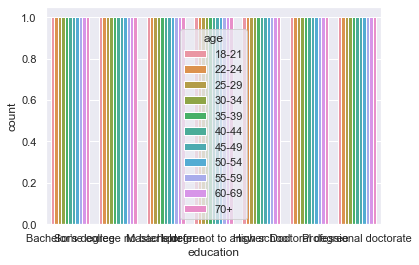

In [92]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='education', hue="age", data=df6)
plt.show()

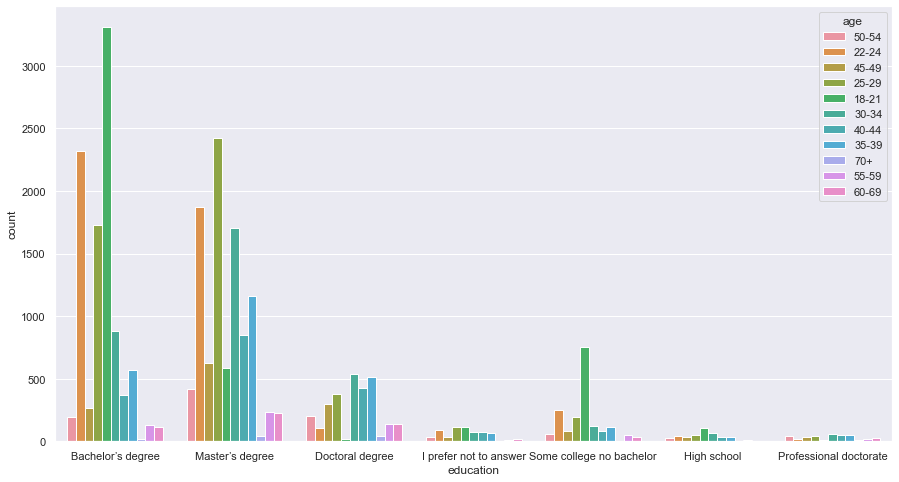

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize = (15,8))
ax = sns.countplot(x='education', hue="age", data=data)
plt.show()

In [106]:
#age_ed = data[['age'].value_counts()][data['education'].value_counts()]
#age_ed.sort_values(by='age', ascending=False,inplace=True)
#top_20_pot = pot_players[:10]                       


#fig = px.bar(age_ed, x='education', y='age', color='age', orientation='h',
             #hover_data=['age', 'education'],
             #height=600,
             #title='Top 10 players under 21')
#fig.show()

df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')
df6.sort_values(by='age', ascending=True,inplace=True)

fig = px.bar(df6, x='age', y='education', color='count', orientation='v',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [113]:
fig = px.histogram(df6, y='age', color='education', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [114]:
df7 = data.groupby('age')['salary'].value_counts()
df7 = df7.reset_index(name='count')

In [121]:
fig = px.histogram(df7, y='age', color='salary', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [117]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [ ]:
scatterplot
chisquare
cat -> numerical

In [128]:
fig = px.histogram(df8, y='count', color='salary', x='gender',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [133]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        fig, axes = plt.subplots(1, figsize=(15, 8))
        sns.countplot(y=df[col], data=df)
        plt.show()

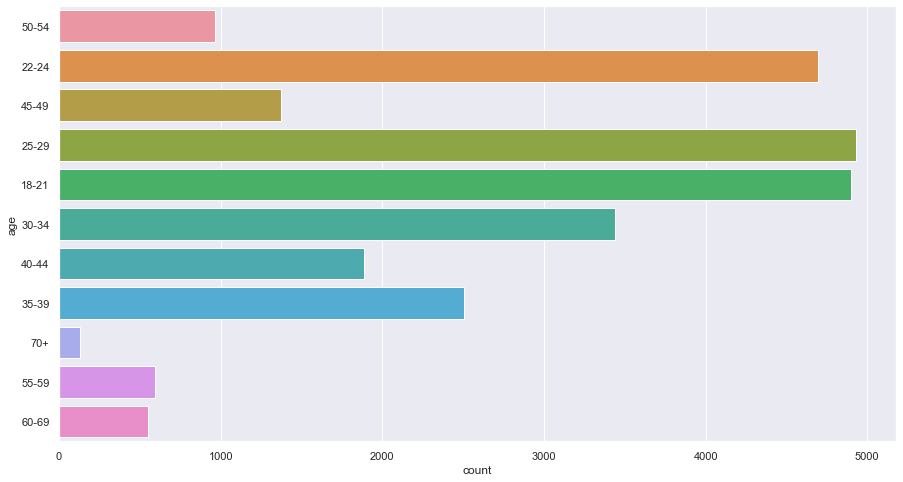

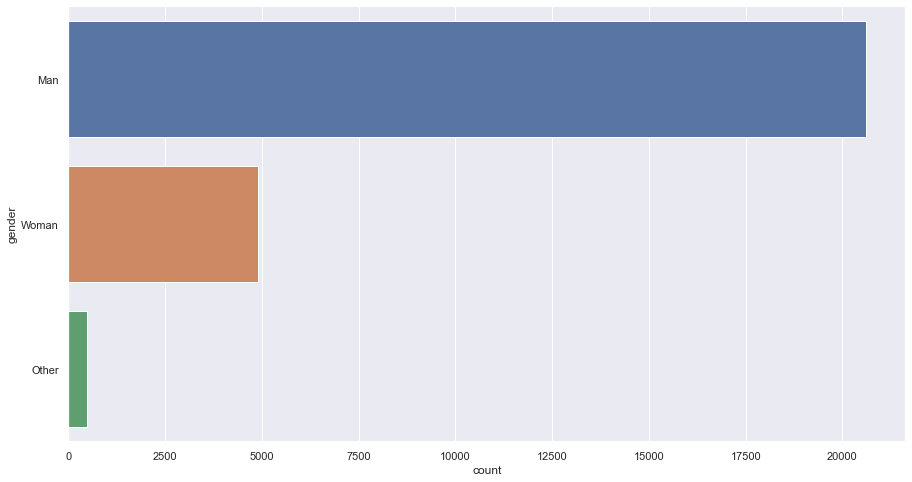

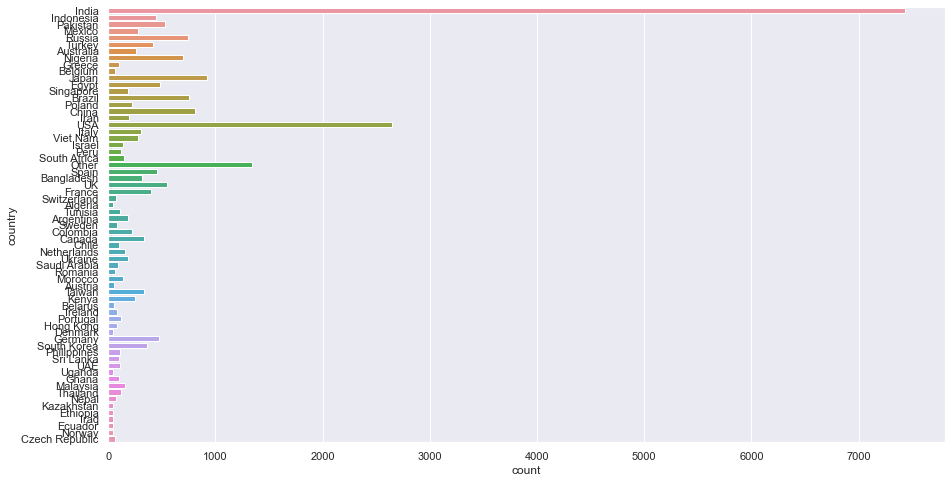

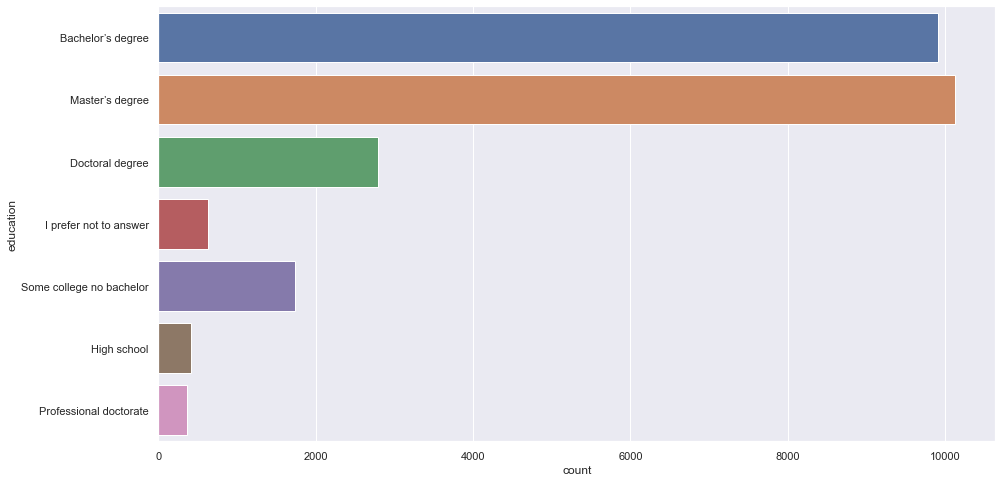

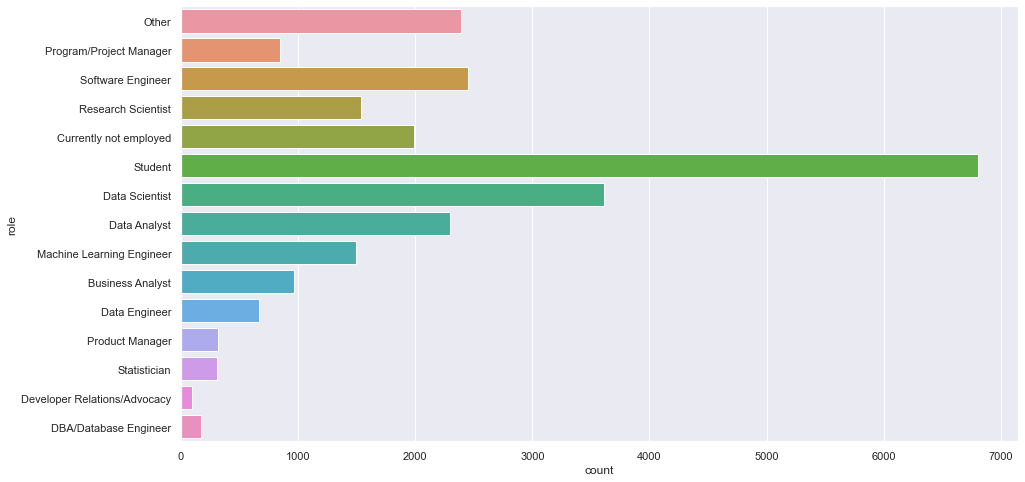

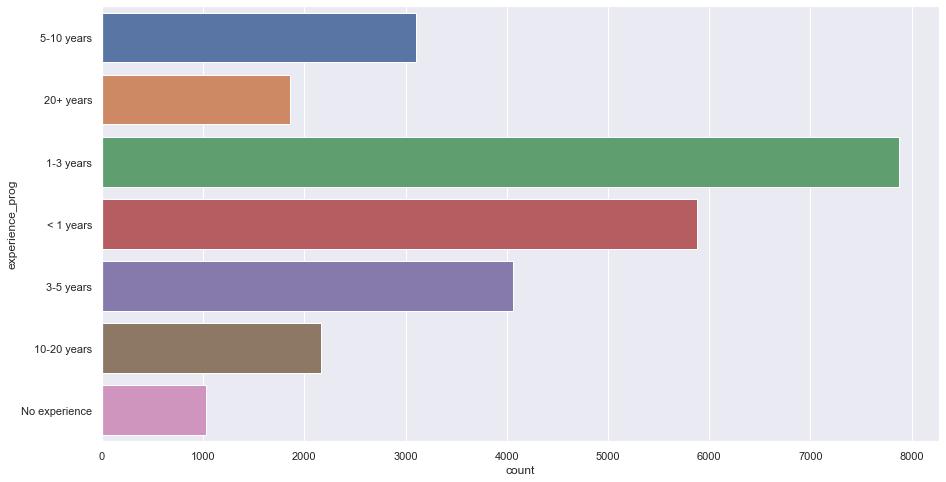

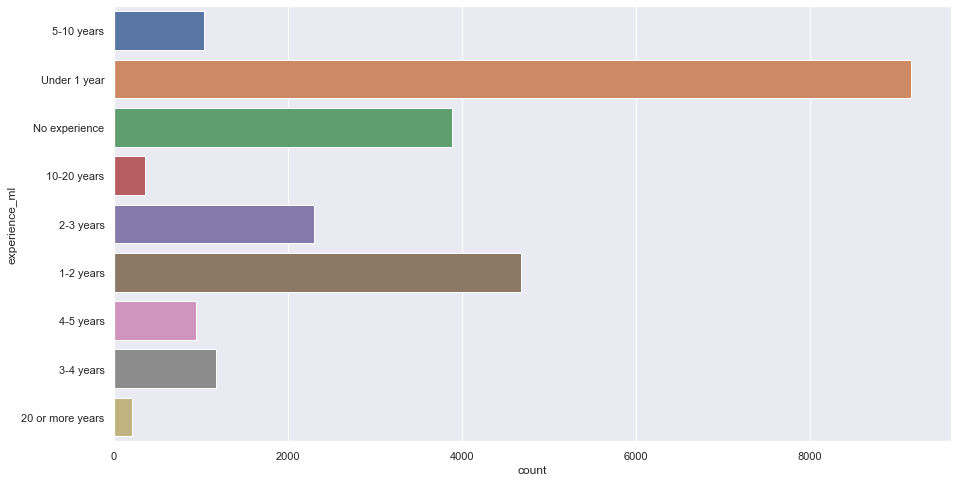

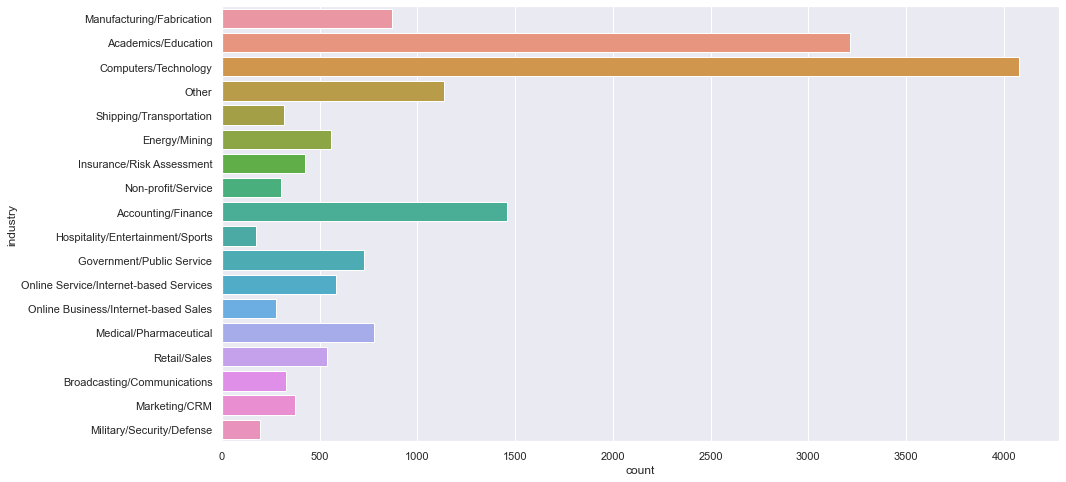

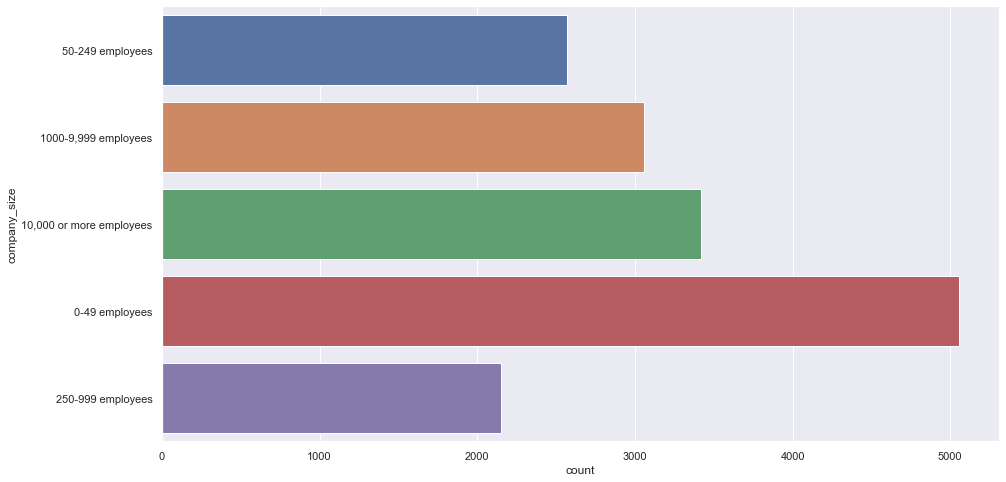

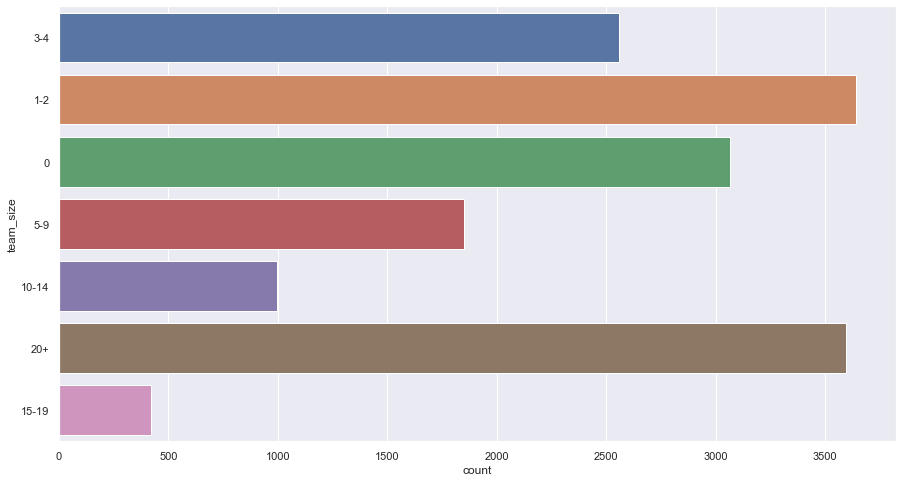

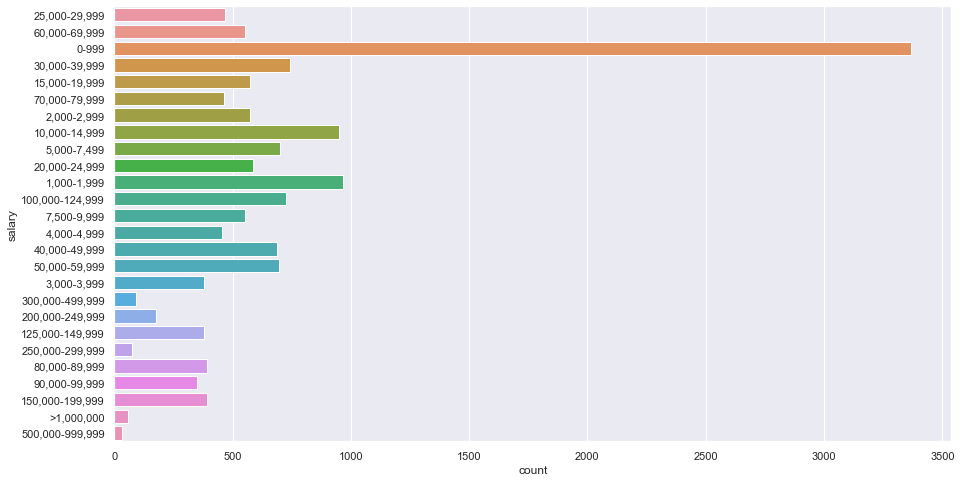

In [134]:
dist_cat(data)

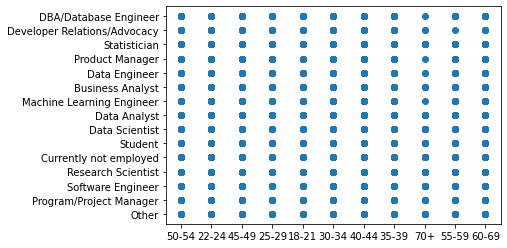

In [13]:
plt.scatter(data['age'], data['role'])

In [9]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# This is to encode the data into numbers that can be used in our scatterplot
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(df), columns=list(df.columns))
categories = pd.DataFrame(np.array(ord_enc.categories_).transpose(), columns=list(df.columns))

# Generate the random noise
xnoise, ynoise = np.random.random(len(df))/2, np.random.random(len(df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(enc_df["Playing_Role"]+xnoise, enc_df["Bought_By"]+ynoise, alpha=0.5)
# You can also set xticks and yticks to be your category names:
plt.xticks([0.25, 1.25, 2.25], categories["Playing_Role"]) # The reason the xticks start at 0.25
# and go up in increments of 1 is because the center of the noise will be around 0.25 and ordinal
# encoded labels go up in increments of 1.
plt.yticks([0.25, 1.25, 2.25], categories["Bought_By"]) # This has the same reason explained for xticks

# Extra unnecessary styling...
plt.grid()
sns.despine(left=True, bottom=True)

In [15]:
xnoise, ynoise = np.random.random(len(data))/2, np.random.random(len(data))/2 

In [18]:

fig = px.scatter(data, x="age", y="education")
fig.show()

In [ ]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



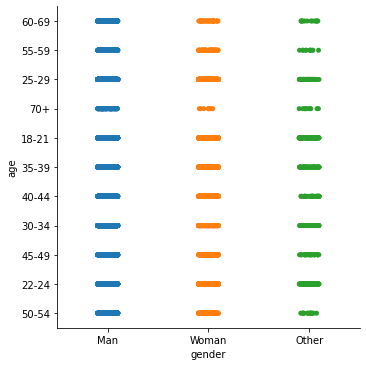

In [39]:
sns.catplot("gender", "age", data = data)

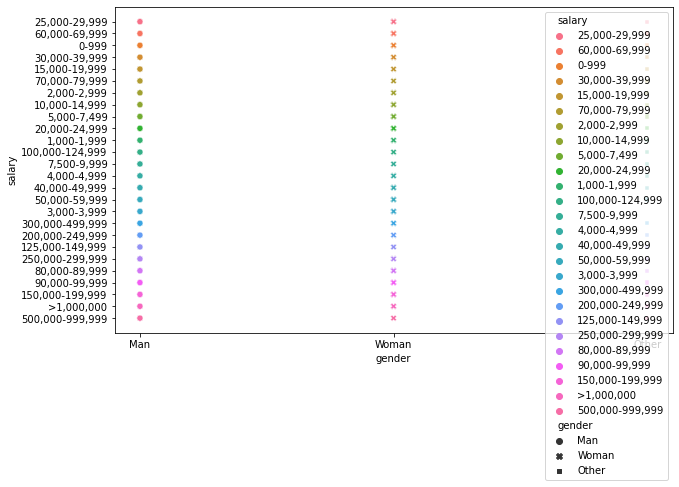

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='gender', y='salary',
                style='gender',
                hue='salary',
                data=data,
                ax=ax)
plt.show()

In [ ]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [27]:
def col_cat_val(data, columns=[]):
    for i in columns:
        for j in columns:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                print (i,"vs", j)
                print (chi2_contingency(data_crosstab, correction=False), '\n')


In [22]:
col_cat_val(data)

In [53]:
col_cat_val(data, columns= data.select_dtypes(np.object))

age vs gender
(234.57483117655224, 1.4473348559613121e-38, 20, array([[3.88675925e+03, 9.15175374e+01, 9.22723213e+02],
       [3.72259700e+03, 8.76521773e+01, 8.83750818e+02],
       [3.91055088e+03, 9.20777346e+01, 9.28371386e+02],
       [2.72889993e+03, 6.42546106e+01, 6.47845455e+02],
       [1.98580803e+03, 4.67577869e+01, 4.71434182e+02],
       [1.49887268e+03, 3.52924191e+01, 3.55834905e+02],
       [1.09044970e+03, 2.56757017e+01, 2.58874601e+02],
       [7.64504370e+02, 1.80010010e+01, 1.81494629e+02],
       [4.69488161e+02, 1.10545567e+01, 1.11457283e+02],
       [4.38559042e+02, 1.03263004e+01, 1.04114658e+02],
       [1.01510954e+02, 2.39017441e+00, 2.40988719e+01]])) 

age vs country
(7681.812994117272, 0.0, 640, array([[8.30262195e+00, 3.43426635e+01, 4.98157317e+01, 9.62349363e+00,
        5.98166173e+01, 9.62349363e+00, 1.22652370e+01, 1.41710661e+02,
        6.24583606e+01, 1.92469873e+01, 1.53598506e+02, 4.24565895e+01,
        1.18878451e+01, 9.05740577e+00, 9.434

        1.20691487e+01, 1.54252493e+00, 3.35314365e+01]])) 

age vs experience_prog
(14532.385633540729, 0.0, 60, array([[1485.79193778,  408.71543526,  350.97447349,  766.29426712,
         584.76875987, 1109.72090248,  194.734224  ],
       [1423.03761599,  391.45281639,  336.15061795,  733.92884919,
         560.07030378, 1062.85042159,  186.50937512],
       [1494.88676703,  411.21726408,  353.12285835,  770.9849074 ,
         588.34824626, 1116.51372579,  195.92623109],
       [1043.17691449,  286.95976591,  246.41974358,  538.01644015,
         410.5670889 ,  779.1368344 ,  136.72321257],
       [ 759.11508105,  208.81931236,  179.31852308,  391.51210873,
         298.76779733,  566.97431949,   99.49285797],
       [ 572.97424248,  157.6152158 ,  135.34824626,  295.51033766,
         225.50764255,  427.94786894,   75.09644631],
       [ 416.84634043,  114.66715435,   98.46763947,  214.98767951,
         164.05979286,  311.33773534,   54.63365803],
       [ 292.24717976,   80.3920

gender vs education
(147.41639080306643, 1.8940712140568913e-25, 12, array([[7.85678920e+03, 2.21658684e+03, 3.30703654e+02, 4.97245062e+02,
        8.03522643e+03, 2.85499557e+02, 1.37594925e+03],
       [1.84995765e+02, 5.21916991e+01, 7.78674008e+00, 1.17081200e+01,
        1.89197243e+02, 6.72236553e+00, 3.23980672e+01],
       [1.86521503e+03, 5.26221461e+02, 7.85096061e+01, 1.18046818e+02,
        1.90757633e+03, 6.77780772e+01, 3.26652678e+02]])) 

gender vs role
(302.18707029754563, 9.028357333894705e-48, 28, array([[7.67676587e+02, 1.57500589e+03, 1.35612290e+02, 1.82481800e+03,
        5.29760290e+02, 2.86768444e+03, 7.85123782e+01, 1.18878843e+03,
        1.89777900e+03, 2.52984330e+02, 6.73303122e+02, 1.21971755e+03,
        1.94219004e+03, 2.48226004e+02, 5.39594163e+03],
       [1.80756940e+01, 3.70850499e+01, 3.19312363e+00, 4.29671197e+01,
        1.24737227e+01, 6.75224271e+01, 1.84865052e+00, 2.79911832e+01,
        4.46850576e+01, 5.95676279e+00, 1.58535787e+01, 2.87

country vs education
(4038.636654512343, 0.0, 384, array([[1.67831209e+01, 4.73491703e+00, 7.06425904e-01, 1.06217996e+00,
        1.71642860e+01, 6.09864090e-01, 2.93920610e+00],
       [6.94210911e+01, 1.95853386e+01, 2.92203442e+00, 4.39356255e+00,
        7.09977284e+01, 2.52261964e+00, 1.21576252e+01],
       [1.00698726e+02, 2.84095022e+01, 4.23855542e+00, 6.37307974e+00,
        1.02985716e+02, 3.65918454e+00, 1.76352366e+01],
       [1.94531629e+01, 5.48819928e+00, 8.18811843e-01, 1.23116313e+00,
        1.98949679e+01, 7.06887922e-01, 3.40680707e+00],
       [1.20914758e+02, 3.41129250e+01, 5.08947753e+00, 7.65252377e+00,
        1.23660879e+02, 4.39379355e+00, 2.11756439e+01],
       [1.94531629e+01, 5.48819928e+00, 8.18811843e-01, 1.23116313e+00,
        1.98949679e+01, 7.06887922e-01, 3.40680707e+00],
       [2.47932468e+01, 6.99476379e+00, 1.04358372e+00, 1.56912948e+00,
        2.53563316e+01, 9.00935587e-01, 4.34200901e+00],
       [2.86457360e+02, 8.08164247e+01, 1.2057

country vs industry
(3427.5666775580366, 9.457206680889648e-240, 1088, array([[ 5.11877489,  2.32367534,  0.51920368, ...,  1.80924962,
         0.85366003,  0.50327718],
       [27.36575804, 12.42272588,  2.77574273, ...,  9.6725268 ,
         4.56379786,  2.69059724],
       [40.16269525, 18.23191424,  4.07375191, ..., 14.19565084,
         6.69794793,  3.9487902 ],
       ...,
       [ 4.72502297,  2.14493109,  0.47926493, ...,  1.67007657,
         0.78799387,  0.46456355],
       [25.59387443, 11.61837672,  2.59601838, ...,  9.04624809,
         4.26830015,  2.51638591],
       [33.66578867, 15.282634  ,  3.41476263, ..., 11.89929556,
         5.61445636,  3.31001531]])) 

country vs company_size
(1764.066667842536, 4.007350421850482e-223, 256, array([[   8.08750231,    5.46526368,    4.89409882,    3.44618793,
           4.10694726],
       [  42.92597379,   29.00793797,   25.97637068,   18.29130515,
          21.79841241],
       [  63.14472956,   42.67109716,   38.21161775,   2

education vs age
(6273.398106863776, 0.0, 60, array([[1.86941081e+03, 1.79045386e+03, 1.88085385e+03, 1.31251634e+03,
        9.55112155e+02, 7.20911331e+02, 5.24472529e+02, 3.67702922e+02,
        2.25809263e+02, 2.10933315e+02, 4.88236245e+01],
       [5.27405190e+02, 5.05129558e+02, 5.30633543e+02, 3.70292034e+02,
        2.69459824e+02, 2.03386209e+02, 1.47966157e+02, 1.03737728e+02,
        6.37061564e+01, 5.95092981e+01, 1.37743041e+01],
       [7.86862126e+01, 7.53627998e+01, 7.91678666e+01, 5.52457167e+01,
        4.02020560e+01, 3.03442036e+01, 2.20758095e+01, 1.54771493e+01,
        9.50463943e+00, 8.87848920e+00, 2.05505717e+00],
       [1.18312363e+02, 1.13315289e+02, 1.19036576e+02, 8.30673007e+01,
        6.04476957e+01, 4.56254572e+01, 3.31931236e+01, 2.32713972e+01,
        1.42911485e+01, 1.33496708e+01, 3.08997805e+00],
       [1.91186740e+03, 1.83111724e+03, 1.92357032e+03, 1.34232518e+03,
        9.76803912e+02, 7.37284103e+02, 5.36383937e+02, 3.76053902e+02,
      

education vs experience_prog
(3228.4218350479246, 0.0, 36, array([[3003.41577792,  826.1872714 ,  709.468294  , 1549.00577523,
        1182.0657221 , 2243.21668656,  393.6404728 ],
       [ 847.33492473,  233.08705194,  200.15785624,  437.01131945,
         333.48881531,  632.86470566,  111.05532669],
       [ 126.41812652,   34.77542063,   29.86254957,   65.1998999 ,
          49.75486082,   94.4202441 ,   16.56889847],
       [ 190.08193124,   52.28822238,   44.9012436 ,   98.03438186,
          74.81126554,  141.97000732,   24.91294806],
       [3071.62699727,  844.95098756,  725.58118046, 1584.18557733,
        1208.91187002, 2294.16286143,  402.58052593],
       [ 109.13795095,   30.02194587,   25.78061833,   56.28768336,
          42.95383668,   81.5138798 ,   14.30408501],
       [ 525.98429138,  144.68910022,  124.24825781,  271.27536288,
         207.01362954,  392.85161514,   68.93774304]])) 

education vs experience_ml
(3968.9164745419175, 0.0, 48, array([[1.76734445e+03, 1.

role vs experience_ml
(4652.66200071542, 0.0, 112, array([[1.59612065e+02, 1.23592658e+01, 7.86964301e+01, 7.20388145e+00,
        3.99798350e+01, 3.22638292e+01, 3.52682917e+01, 1.32776753e+02,
        3.12839648e+02],
       [3.68229561e+02, 2.85131767e+01, 1.81554896e+02, 1.66195588e+01,
        9.22346131e+01, 7.44335691e+01, 8.13649491e+01, 3.06319736e+02,
        7.21729940e+02],
       [3.03085796e+01, 2.34688895e+00, 1.49435884e+01, 1.36793803e+00,
        7.59173192e+00, 6.12654711e+00, 6.69706155e+00, 2.52128484e+01,
        5.94048160e+01],
       [4.12117959e+02, 3.19115938e+01, 2.03193988e+02, 1.86004041e+01,
        1.03227835e+02, 8.33051276e+01, 9.10626421e+01, 3.42829250e+02,
        8.07751200e+02],
       [1.25957733e+02, 9.75330471e+00, 6.21032247e+01, 5.68493727e+00,
        3.15500547e+01, 2.54609750e+01, 2.78319441e+01, 1.04780669e+02,
        2.46877158e+02],
       [6.79974952e+02, 5.26526059e+01, 3.35260377e+02, 3.06897786e+01,
        1.70320999e+02, 1.374494

experience_prog vs country
(4107.018703631245, 0.0, 384, array([[1.33390829e+01, 5.51752974e+01, 8.00344974e+01, 1.54612097e+01,
        9.61020290e+01, 1.54612097e+01, 1.97054634e+01, 2.27673892e+02,
        1.00346283e+02, 3.09224194e+01, 2.46773034e+02, 6.82112193e+01,
        1.90991414e+01, 1.45517268e+01, 1.51580487e+01, 1.46123590e+02,
        1.30359219e+01, 1.21567551e+02, 1.42485658e+02, 3.00129365e+01,
        3.09224194e+01, 2.39497170e+01, 2.25369869e+03, 1.34603473e+02,
        5.91163901e+01, 1.30359219e+01, 2.54655219e+01, 4.18362145e+01,
        9.42830632e+01, 2.79211258e+02, 1.36422439e+01, 7.51839218e+01,
        4.72931121e+01, 8.45819120e+01, 4.24425365e+01, 2.27370731e+01,
        4.63836292e+01, 2.12819004e+02, 1.36422439e+01, 4.05932545e+02,
        1.60675317e+02, 3.54698341e+01, 3.27413853e+01, 6.63922535e+01,
        3.60761560e+01, 1.84928195e+01, 2.24945443e+02, 2.69813268e+01,
        5.51752974e+01, 4.42615023e+01, 1.08834790e+02, 1.37635083e+02,
       

         21.85368072,   3.62146709]])) 

experience_ml vs age
(4620.686960947266, 0.0, 80, array([[8.56315778e+02, 8.46278522e+02, 8.94496716e+02, 6.18964174e+02,
        4.50102088e+02, 3.47367812e+02, 2.50734613e+02, 1.76144018e+02,
        1.09228972e+02, 1.01159805e+02, 2.42075019e+01],
       [6.63072325e+01, 6.55300160e+01, 6.92637030e+01, 4.79283489e+01,
        3.48528248e+01, 2.68977856e+01, 1.94151722e+01, 1.36393871e+01,
        8.45794393e+00, 7.83312284e+00, 1.87446325e+00],
       [4.22204892e+02, 4.17256041e+02, 4.41029932e+02, 3.05179128e+02,
        2.21921992e+02, 1.71269049e+02, 1.23624232e+02, 8.68474783e+01,
        5.38551402e+01, 4.98766524e+01, 1.19354635e+01],
       [3.86486907e+01, 3.81956723e+01, 4.03719374e+01, 2.79361371e+01,
        2.03147680e+01, 1.56779911e+01, 1.13165783e+01, 7.95002947e+00,
        4.92990654e+00, 4.56571525e+00, 1.09257388e+00],
       [2.14491075e+02, 2.11976930e+02, 2.24054686e+02, 1.55038941e+02,
        1.12742149e+02, 8.7009135

experience_ml vs industry
(341.42348282854687, 1.1867254950438684e-19, 136, array([[ 616.76292149,  276.71865642,   63.32560864,  803.27821898,
         104.04947272,  134.38875146,   31.9682333 ,   82.8730634 ,
         167.98593933,   69.02694962,  144.97695613,   37.66957427,
          55.79169379,   52.53378466,  114.43405807,  213.18942846,
          99.16260904,   59.8640802 ],
       [  67.63097253,   30.34350996,    6.94395261,   88.08325739,
          11.40951699,   14.73636245,    3.50546804,    9.08742351,
          18.42045307,    7.56913162,   15.89740919,    4.13064705,
           6.1178232 ,    5.76057805,   12.54823591,   23.37722953,
          10.87364926,    6.56437964],
       [ 366.15369093,  164.27958599,   37.59451894,  476.8822419 ,
          61.77105846,   79.78258039,   18.97858352,   49.19925791,
          99.72822549,   40.97923447,   86.06848067,   22.36329905,
          33.12185913,   31.18773597,   67.93607603,  126.56418435,
          58.86987371,   35.53

industry vs education
(1814.8128008822325, 2.2387733993826e-311, 102, array([[1015.87993874,  452.61782542,   48.23460949,   72.25347626,
        1409.04122511,   59.45653905,  156.51638591],
       [ 461.16018377,  205.46652374,   21.89617152,   32.79957121,
         639.63632466,   26.99038285,   71.05084227],
       [ 103.04196018,   45.90958652,    4.89249617,    7.32875957,
         142.92079632,    6.03075038,   15.87565084],
       [1289.28882083,  574.43313936,   61.21623277,   91.69941807,
        1788.26358346,   75.45837672,  198.64042879],
       [ 176.37243492,   78.58143951,    8.37427259,   12.54431853,
         244.63130168,   10.32257274,   27.17366003],
       [ 229.47381317,  102.24036753,   10.89555896,   16.3211026 ,
         318.2837366 ,   13.4304441 ,   35.35497703],
       [  54.68177642,   24.36306279,    2.59632466,    3.88918836,
          75.84447167,    3.20036753,    8.42480858],
       [ 134.01776417,   59.71062787,    6.36324655,    9.53188361,
        

company_size vs age
(934.4934660219608, 5.3900774413017566e-170, 40, array([[ 334.69817242,  701.12423851, 1061.01809119,  856.96418682,
         642.64537567,  495.20398745,  368.29241277,  256.93372716,
         161.12793059,  145.57504154,   31.41683589],
       [ 226.17783521,  473.79632023,  717.00055381,  579.10774722,
         434.2782598 ,  334.64229894,  248.87969971,  173.62722294,
         108.88486862,   98.37474617,   21.23044736],
       [ 202.54039751,  424.28072119,  642.06811888,  518.58624085,
         388.89262199,  299.66943573,  222.86973109,  155.48175497,
          97.50550735,   88.09377884,   19.01169159],
       [ 142.6191619 ,  298.75798412,  452.11334687,  365.16337456,
         273.8393945 ,  211.01273768,  156.93409636,  109.48273952,
          68.65866716,   62.03138268,   13.38711464],
       [ 169.96443296,  356.04073595,  538.79988924,  435.17845056,
         326.34434804,  251.47154021,  187.02406006,  130.47455541,
          81.82302628,   73.9250507

company_size vs experience_prog
(477.21250928790454, 8.879139227008745e-86, 24, array([[1225.25659959,  595.98670851,  526.62082333,  807.19494185,
         764.26896806,  836.12331549,  299.54864316],
       [ 827.98744693,  402.74789244,  355.87274629,  545.47535536,
         516.46741739,  565.02418313,  202.42495846],
       [ 741.45597194,  360.65743647,  318.68112732,  488.46870962,
         462.49233893,  505.97452464,  181.26989108],
       [ 522.09747092,  253.95754107,  224.39985232,  343.95606424,
         325.66475909,  356.28281337,  127.64149898],
       [ 622.20251061,  302.65042151,  267.42545074,  409.90492893,
         388.10651652,  424.59516337,  152.11500831]])) 

company_size vs experience_ml
(297.18586640794865, 9.467547904401282e-45, 32, array([[ 962.64782836,  105.8974359 ,  571.47566719,   59.89534275,
         312.13500785,  267.36787023,  304.41653585,  652.05651491,
        1484.10779696],
       [ 659.57692308,   72.55769231,  391.55769231,   41.03846154,


         33.49869776]])) 

team_size vs experience_prog
(774.368553498265, 2.0463687767452985e-139, 36, array([[741.39451817, 363.09711026, 320.72628054, 489.63958824,
        464.93910455, 501.22981521, 182.97358303],
       [881.25288354, 431.59258341, 381.22882302, 582.00632519,
        552.6462855 , 595.7829592 , 217.49014015],
       [241.0016123 , 118.03026169, 104.25697631, 159.16482699,
        151.13555748, 162.93240729,  59.47835793],
       [101.8691554 ,  49.89030138,  44.06846087,  67.27750217,
         63.88360412,  68.87002356,  25.1409525 ],
       [869.8803175 , 426.0228823 , 376.3090661 , 574.49553516,
        545.5143867 , 588.09438174, 214.68343048],
       [618.9579561 , 303.13394518, 267.76038695, 408.7787424 ,
        388.15738559, 418.45491752, 152.75666625],
       [447.64355699, 219.23291579, 193.6500062 , 295.63747985,
        280.72367605, 302.63549547, 110.47686965]])) 

team_size vs experience_ml
(1591.0924711026958, 6.519201449017989e-302, 48, array([[ 56

salary vs education
(959.5056864361632, 3.9291466358158703e-118, 150, array([[1.04565740e+03, 4.85288350e+02, 4.99078682e+01, 7.31106491e+01,
        1.48826139e+03, 6.34793061e+01, 1.63295043e+02],
       [3.00754532e+02, 1.39579819e+02, 1.43546228e+01, 2.10282633e+01,
        4.28057371e+02, 1.82580729e+01, 4.69673186e+01],
       [2.94857384e+02, 1.36842960e+02, 1.40731596e+01, 2.06159444e+01,
        4.19664089e+02, 1.79000715e+01, 4.60463907e+01],
       [2.25022741e+02, 1.04432785e+02, 1.07400429e+01, 1.57332207e+01,
        3.20269963e+02, 1.36605809e+01, 3.51406666e+01],
       [1.17632577e+02, 5.45931388e+01, 5.61445000e+00, 8.22467676e+00,
        1.67423884e+02, 7.14118641e+00, 1.83700864e+01],
       [1.77845559e+02, 8.25379118e+01, 8.48833734e+00, 1.24346696e+01,
        2.53123709e+02, 1.07965694e+01, 2.77732441e+01],
       [1.21667468e+02, 5.64657267e+01, 5.80703008e+00, 8.50678968e+00,
        1.73166656e+02, 7.38613475e+00, 1.90001949e+01],
       [1.78466311e+02, 8.2

           9.33064778]])) 

salary vs team_size
(1644.3122698217971, 1.4794491294049439e-249, 150, array([[629.53960107, 762.40835553, 209.48171009,  88.65213436,
        751.9014359 , 536.94737184, 390.0693912 ],
       [181.06971607, 219.28575141,  60.25164057,  25.49834319,
        216.26372555, 154.43811318, 112.19271003],
       [177.51932948, 214.9860308 ,  59.07023585,  24.99837567,
        212.02326035, 151.40991489, 109.99285297],
       [135.47527776, 164.06828666,  45.07991683,  19.07770775,
        161.807225  , 115.54967189,  83.94191411],
       [ 70.82086934,  85.76811123,  23.56591515,   9.97303619,
         84.58612176,  60.4045871 ,  43.88135924],
       [107.07218504, 129.67052173,  35.6286791 ,  15.07796764,
        127.88350335,  91.3240855 ,  66.34305763],
       [ 73.25008122,  88.71002534,  24.37424469,  10.31511923,
         87.48749269,  62.47651225,  45.38652459],
       [107.44590995, 130.1231239 ,  35.75303749,  15.1305958 ,
        128.3298681 ,  91.642843

age vs experience_prog
(14532.385633540729, 0.0, 60, array([[1485.79193778,  408.71543526,  350.97447349,  766.29426712,
         584.76875987, 1109.72090248,  194.734224  ],
       [1423.03761599,  391.45281639,  336.15061795,  733.92884919,
         560.07030378, 1062.85042159,  186.50937512],
       [1494.88676703,  411.21726408,  353.12285835,  770.9849074 ,
         588.34824626, 1116.51372579,  195.92623109],
       [1043.17691449,  286.95976591,  246.41974358,  538.01644015,
         410.5670889 ,  779.1368344 ,  136.72321257],
       [ 759.11508105,  208.81931236,  179.31852308,  391.51210873,
         298.76779733,  566.97431949,   99.49285797],
       [ 572.97424248,  157.6152158 ,  135.34824626,  295.51033766,
         225.50764255,  427.94786894,   75.09644631],
       [ 416.84634043,  114.66715435,   98.46763947,  214.98767951,
         164.05979286,  311.33773534,   54.63365803],
       [ 292.24717976,   80.39209949,   69.03476687,  150.72590767,
         115.02082932,  2

age vs salary
(4090.8421695571183, 0.0, 250, array([[2.03790462e+02, 5.86147099e+01, 5.74654019e+01, 4.38551751e+01,
        2.29256708e+01, 3.46607108e+01, 2.37120395e+01, 3.47816906e+01,
        3.55075694e+01, 1.07067117e+01, 2.84302514e+01, 4.53674225e+00,
        2.29861607e+01, 4.48230134e+01, 5.50458060e+00, 2.75833929e+01,
        4.16170489e+01, 4.22824378e+01, 4.21614580e+01, 1.93567669e+00,
        3.33299331e+01, 3.33904230e+01, 2.80673121e+01, 2.36515496e+01,
        2.11714638e+01, 3.50841401e+00],
       [4.57926580e+02, 1.31709960e+02, 1.29127412e+02, 9.85446040e+01,
        5.15150413e+01, 7.78842180e+01, 5.32820480e+01, 7.81560652e+01,
        7.97871483e+01, 2.40584757e+01, 6.38840881e+01, 1.01942694e+01,
        5.16509648e+01, 1.00719381e+02, 1.23690468e+01, 6.19811578e+01,
        9.35154311e+01, 9.50105906e+01, 9.47387434e+01, 4.34955493e+00,
        7.48938990e+01, 7.50298226e+01, 6.30685466e+01, 5.31461244e+01,
        4.75732571e+01, 7.88356832e+00],
       [7

gender vs company_size
(10.36471254707356, 0.2403549806477123, 8, array([[4136.13531475, 2795.06196542, 2502.95507969, 1762.46003323,
        2100.38760692],
       [  89.27358316,   60.32810289,   54.02332164,   38.04061289,
          45.33437942],
       [ 829.59110209,  560.6099317 ,  502.02159867,  353.49935389,
         421.27801366]])) 

gender vs team_size
(30.669263876433188, 0.0022120469605010685, 12, array([[2511.84918765, 2985.69018976,  816.51494481,  345.13332507,
        2947.15986605, 2097.03336227, 1516.6191244 ],
       [  53.77105296,   63.91454794,   17.47910207,    7.38825499,
          63.08973087,   44.89110753,   32.46620365],
       [ 498.37975939,  592.39526231,  162.00595312,   68.47841994,
         584.75040308,  416.0755302 ,  300.91467196]])) 

gender vs salary
(293.3788901712158, 3.7270342588276666e-36, 50, array([[2.76725996e+03, 7.95926061e+02, 7.80319667e+02, 5.95507115e+02,
        3.11306478e+02, 4.70655968e+02, 3.21984536e+02, 4.72298746e+02,
       

(4039.788711566135, 0.0, 896, array([[1.63985677e+00, 3.36441689e+00, 2.89685443e-01, 3.89804797e+00,
        1.13163670e+00, 6.12574597e+00, 1.67712625e-01, 2.53940631e+00,
        4.05390213e+00, 5.40407346e-01, 1.43826281e+00, 2.60547492e+00,
        4.14876988e+00, 5.30242945e-01, 1.15264313e+01],
       [6.78304393e+00, 1.39164517e+01, 1.19824433e+00, 1.61237439e+01,
        4.68086089e+00, 2.53383129e+01, 6.93720402e-01, 1.05039079e+01,
        1.67684134e+01, 2.23532130e+00, 5.94917799e+00, 1.07771917e+01,
        1.71608209e+01, 2.19327763e+00, 4.76775113e+01],
       [9.83914065e+00, 2.01865014e+01, 1.73811266e+00, 2.33882878e+01,
        6.78982020e+00, 3.67544758e+01, 1.00627575e+00, 1.52364378e+01,
        2.43234128e+01, 3.24244408e+00, 8.62957687e+00, 1.56328495e+01,
        2.48926193e+01, 3.18145767e+00, 6.91585878e+01],
       [1.90074308e+00, 3.89966504e+00, 3.35771763e-01, 4.51819197e+00,
        1.31166981e+00, 7.10029646e+00, 1.94394179e-01, 2.94340276e+00,
       

country vs company_size
(1764.066667842536, 4.007350421850482e-223, 256, array([[   8.08750231,    5.46526368,    4.89409882,    3.44618793,
           4.10694726],
       [  42.92597379,   29.00793797,   25.97637068,   18.29130515,
          21.79841241],
       [  63.14472956,   42.67109716,   38.21161775,   26.90677497,
          32.06578057],
       [  12.13125346,    8.19789551,    7.34114824,    5.16928189,
           6.1604209 ],
       [  46.65866716,   31.53036736,   28.23518553,   19.88185342,
          23.69392653],
       [  11.19808012,    7.56728817,    6.77644453,    4.77164482,
           5.68654237],
       [  14.93077349,   10.08971756,    9.03525937,    6.3621931 ,
           7.58205649],
       [ 176.36976186,  119.18478863,  106.72900129,   75.15340594,
          89.56304227],
       [  74.03175189,   50.02818288,   44.7998277 ,   31.5458741 ,
          37.59436342],
       [  25.19568027,   17.02639838,   15.24700018,   10.73620085,
          12.79472032],
       

education vs country
(4038.6366545123437, 0.0, 384, array([[1.67831209e+01, 6.94210911e+01, 1.00698726e+02, 1.94531629e+01,
        1.20914758e+02, 1.94531629e+01, 2.47932468e+01, 2.86457360e+02,
        1.26254842e+02, 3.89063258e+01, 3.10487737e+02, 8.58227775e+01,
        2.40303777e+01, 1.83088592e+01, 1.90717283e+01, 1.83851461e+02,
        1.64016864e+01, 1.52955261e+02, 1.79274246e+02, 3.77620221e+01,
        3.89063258e+01, 3.01333308e+01, 2.83558457e+03, 1.69356948e+02,
        7.43797405e+01, 1.64016864e+01, 3.20405036e+01, 5.26379702e+01,
        1.18626150e+02, 3.51301236e+02, 1.71645555e+01, 9.45957725e+01,
        5.95037924e+01, 1.06420244e+02, 5.34008393e+01, 2.86075925e+01,
        5.83594887e+01, 2.67767066e+02, 1.71645555e+01, 5.10740885e+02,
        2.02160320e+02, 4.46278443e+01, 4.11949332e+01, 8.35341701e+01,
        4.53907134e+01, 2.32675086e+01, 2.83024448e+02, 3.39476764e+01,
        6.94210911e+01, 5.56894467e+01, 1.36935009e+02, 1.73171293e+02,
        4.04

education vs salary
(959.5056864361633, 3.929146635815869e-118, 150, array([[1.04565740e+03, 3.00754532e+02, 2.94857384e+02, 2.25022741e+02,
        1.17632577e+02, 1.77845559e+02, 1.21667468e+02, 1.78466311e+02,
        1.82190826e+02, 5.49365863e+01, 1.45876811e+02, 2.32782145e+01,
        1.17942954e+02, 2.29988760e+02, 2.82442336e+01, 1.41531544e+02,
        2.13538821e+02, 2.16952960e+02, 2.16332207e+02, 9.93203820e+00,
        1.71017283e+02, 1.71327659e+02, 1.44014554e+02, 1.21357092e+02,
        1.08631668e+02, 1.80018192e+01],
       [4.85288350e+02, 1.39579819e+02, 1.36842960e+02, 1.04432785e+02,
        5.45931388e+01, 8.25379118e+01, 5.64657267e+01, 8.28260022e+01,
        8.45545449e+01, 2.54960042e+01, 6.77012540e+01, 1.08033916e+01,
        5.47371841e+01, 1.06737509e+02, 1.31081151e+01, 6.56846209e+01,
        9.91031122e+01, 1.00687610e+02, 1.00399519e+02, 4.60944708e+00,
        7.93689169e+01, 7.95129621e+01, 6.68369827e+01, 5.63216815e+01,
        5.04158274e+01, 8.

role vs experience_ml
(4652.66200071542, 0.0, 112, array([[1.59612065e+02, 1.23592658e+01, 7.86964301e+01, 7.20388145e+00,
        3.99798350e+01, 3.22638292e+01, 3.52682917e+01, 1.32776753e+02,
        3.12839648e+02],
       [3.68229561e+02, 2.85131767e+01, 1.81554896e+02, 1.66195588e+01,
        9.22346131e+01, 7.44335691e+01, 8.13649491e+01, 3.06319736e+02,
        7.21729940e+02],
       [3.03085796e+01, 2.34688895e+00, 1.49435884e+01, 1.36793803e+00,
        7.59173192e+00, 6.12654711e+00, 6.69706155e+00, 2.52128484e+01,
        5.94048160e+01],
       [4.12117959e+02, 3.19115938e+01, 2.03193988e+02, 1.86004041e+01,
        1.03227835e+02, 8.33051276e+01, 9.10626421e+01, 3.42829250e+02,
        8.07751200e+02],
       [1.25957733e+02, 9.75330471e+00, 6.21032247e+01, 5.68493727e+00,
        3.15500547e+01, 2.54609750e+01, 2.78319441e+01, 1.04780669e+02,
        2.46877158e+02],
       [6.79974952e+02, 5.26526059e+01, 3.35260377e+02, 3.06897786e+01,
        1.70320999e+02, 1.374494

experience_prog vs country
(4107.018703631245, 0.0, 384, array([[1.33390829e+01, 5.51752974e+01, 8.00344974e+01, 1.54612097e+01,
        9.61020290e+01, 1.54612097e+01, 1.97054634e+01, 2.27673892e+02,
        1.00346283e+02, 3.09224194e+01, 2.46773034e+02, 6.82112193e+01,
        1.90991414e+01, 1.45517268e+01, 1.51580487e+01, 1.46123590e+02,
        1.30359219e+01, 1.21567551e+02, 1.42485658e+02, 3.00129365e+01,
        3.09224194e+01, 2.39497170e+01, 2.25369869e+03, 1.34603473e+02,
        5.91163901e+01, 1.30359219e+01, 2.54655219e+01, 4.18362145e+01,
        9.42830632e+01, 2.79211258e+02, 1.36422439e+01, 7.51839218e+01,
        4.72931121e+01, 8.45819120e+01, 4.24425365e+01, 2.27370731e+01,
        4.63836292e+01, 2.12819004e+02, 1.36422439e+01, 4.05932545e+02,
        1.60675317e+02, 3.54698341e+01, 3.27413853e+01, 6.63922535e+01,
        3.60761560e+01, 1.84928195e+01, 2.24945443e+02, 2.69813268e+01,
        5.51752974e+01, 4.42615023e+01, 1.08834790e+02, 1.37635083e+02,
       

experience_prog vs salary
(3289.4246653487126, 0.0, 150, array([[807.93834059, 232.3811968 , 227.82470275, 173.86622052,
         90.89006562, 137.41426808,  94.00766682, 137.89389903,
        140.77168475,  42.44733935, 112.71327399,  17.98616074,
         91.1298811 , 177.70326814,  21.82320837, 109.35585732,
        164.99304789, 167.63101813, 167.15138717,   7.67409525,
        132.13832759, 132.37814307, 111.27438113,  93.76785134,
         83.9354168 ,  13.90929764],
       [404.07861737, 116.22207784, 113.94321357,  86.95666298,
         45.4573452 ,  68.72574881,  47.01656812,  68.96562926,
         70.40491196,  21.22941979,  56.37190566,   8.99551686,
         45.57728543,  88.87570658,  10.91456046,  54.69274251,
         82.51887467,  83.83821714,  83.59833669,   3.83808719,
         66.08706387,  66.20700409,  55.65226431,  46.8966279 ,
         41.97907868,   6.95653304],
       [355.48411409, 102.24520824, 100.24040023,  76.49925281,
         39.99064388,  60.46078877,  

experience_ml vs company_size
(297.18586640794877, 9.467547904400736e-45, 32, array([[ 962.64782836,  659.57692308,  589.62179487,  415.85570382,
         490.29774987],
       [ 105.8974359 ,   72.55769231,   64.86217949,   45.74679487,
          53.93589744],
       [ 571.47566719,  391.55769231,  350.02884615,  246.87264521,
         291.06514914],
       [  59.89534275,   41.03846154,   36.68589744,   25.87428048,
          30.50601779],
       [ 312.13500785,  213.86538462,  191.18269231,  134.83967818,
         158.97723705],
       [ 267.36787023,  183.19230769,  163.76282051,  115.50065411,
         136.17634746],
       [ 304.41653585,  208.57692308,  186.45512821,  131.50536368,
         155.04604919],
       [ 652.05651491,  446.76923077,  399.38461538,  281.68288854,
         332.10675039],
       [1484.10779696, 1016.86538462,  909.01602564,  641.1219911 ,
         755.88880167]])) 

experience_ml vs team_size
(1591.0924711026958, 6.519201449017989e-302, 48, array([[ 560.5

industry vs education
(1814.8128008822325, 2.2387733993826e-311, 102, array([[1015.87993874,  452.61782542,   48.23460949,   72.25347626,
        1409.04122511,   59.45653905,  156.51638591],
       [ 461.16018377,  205.46652374,   21.89617152,   32.79957121,
         639.63632466,   26.99038285,   71.05084227],
       [ 103.04196018,   45.90958652,    4.89249617,    7.32875957,
         142.92079632,    6.03075038,   15.87565084],
       [1289.28882083,  574.43313936,   61.21623277,   91.69941807,
        1788.26358346,   75.45837672,  198.64042879],
       [ 176.37243492,   78.58143951,    8.37427259,   12.54431853,
         244.63130168,   10.32257274,   27.17366003],
       [ 229.47381317,  102.24036753,   10.89555896,   16.3211026 ,
         318.2837366 ,   13.4304441 ,   35.35497703],
       [  54.68177642,   24.36306279,    2.59632466,    3.88918836,
          75.84447167,    3.20036753,    8.42480858],
       [ 134.01776417,   59.71062787,    6.36324655,    9.53188361,
        

industry vs salary
(1753.1971293640113, 2.034095210474872e-160, 425, array([[6.55150218e+02, 1.88435904e+02, 1.84741082e+02, 1.40986616e+02,
        7.37019687e+01, 1.11428042e+02, 7.62300045e+01, 1.11816971e+02,
        1.14150543e+02, 3.44201806e+01, 9.13982197e+01, 1.45848223e+01,
        7.38964330e+01, 1.44098044e+02, 1.76962511e+01, 8.86757196e+01,
        1.33791437e+02, 1.35930544e+02, 1.35541615e+02, 6.22285751e+00,
        1.07149828e+02, 1.07344292e+02, 9.02314340e+01, 7.60355403e+01,
        6.80625041e+01, 1.12789292e+01],
       [3.03168410e+02, 8.71980378e+01, 8.54882724e+01, 6.52410500e+01,
        3.41053213e+01, 5.15629264e+01, 3.52751608e+01, 5.17429017e+01,
        5.28227536e+01, 1.59278150e+01, 4.22941979e+01, 6.74907413e+00,
        3.41953089e+01, 6.66808524e+01, 8.18887662e+00, 4.10343707e+01,
        6.19115067e+01, 6.29013709e+01, 6.27213956e+01, 2.87960496e+00,
        4.95831980e+01, 4.96731856e+01, 4.17542720e+01, 3.51851732e+01,
        3.14956793e+01, 5.

company_size vs experience_prog
(477.21250928790454, 8.879139227008745e-86, 24, array([[1225.25659959,  595.98670851,  526.62082333,  807.19494185,
         764.26896806,  836.12331549,  299.54864316],
       [ 827.98744693,  402.74789244,  355.87274629,  545.47535536,
         516.46741739,  565.02418313,  202.42495846],
       [ 741.45597194,  360.65743647,  318.68112732,  488.46870962,
         462.49233893,  505.97452464,  181.26989108],
       [ 522.09747092,  253.95754107,  224.39985232,  343.95606424,
         325.66475909,  356.28281337,  127.64149898],
       [ 622.20251061,  302.65042151,  267.42545074,  409.90492893,
         388.10651652,  424.59516337,  152.11500831]])) 

company_size vs experience_ml
(297.18586640794865, 9.467547904401282e-45, 32, array([[ 962.64782836,  105.8974359 ,  571.47566719,   59.89534275,
         312.13500785,  267.36787023,  304.41653585,  652.05651491,
        1484.10779696],
       [ 659.57692308,   72.55769231,  391.55769231,   41.03846154,


team_size vs role
(858.6587683967282, 5.186693843915217e-135, 72, array([[173.473397  ,  29.83058415, 408.69800322, 119.13233288,
        648.86270619,  16.72032742, 262.58514201, 434.1585018 ,
         57.00111621, 154.28302121, 278.54545455, 425.22832693,
         55.48108644],
       [206.19781719,  35.45789408, 485.7957336 , 141.60572988,
        771.26565794,  19.8744884 , 312.11980652, 516.05915912,
         67.75393774, 183.38732482, 331.09090909, 505.44437554,
         65.94716607],
       [ 56.39017735,   9.69688701, 132.85352846,  38.72578445,
        210.92273347,   5.43519782,  85.35731117, 141.12985241,
         18.52908347,  50.15205259,  90.54545455, 138.22696267,
         18.03497458],
       [ 23.83560709,   4.09878457,  56.15595932,  16.36903138,
         89.15509116,   2.29740791,  36.07974699,  59.65428501,
          7.83207243,  21.19880938,  38.27272727,  58.42726032,
          7.62321716],
       [203.53683492,  35.00031006, 479.52654099, 139.77830832,
        76

salary vs gender
(293.37889017121586, 3.7270342588276666e-36, 50, array([[2.76725996e+03, 5.84447404e+01, 5.43295302e+02],
       [7.95926061e+02, 1.68100188e+01, 1.56263920e+02],
       [7.80319667e+02, 1.64804106e+01, 1.53199922e+02],
       [5.95507115e+02, 1.25771555e+01, 1.16915730e+02],
       [3.11306478e+02, 6.57481645e+00, 6.11187057e+01],
       [4.70655968e+02, 9.94028978e+00, 9.24037424e+01],
       [3.21984536e+02, 6.80033786e+00, 6.32151257e+01],
       [4.72298746e+02, 9.97498538e+00, 9.27262686e+01],
       [4.82155416e+02, 1.01831590e+01, 9.46614255e+01],
       [1.45385875e+02, 3.07056072e+00, 2.85435644e+01],
       [3.86052888e+02, 8.15346631e+00, 7.57936456e+01],
       [6.16041843e+01, 1.30108505e+00, 1.20947307e+01],
       [3.12127867e+02, 6.59216425e+00, 6.12799688e+01],
       [6.08649341e+02, 1.28547203e+01, 1.19495939e+02],
       [7.47464102e+01, 1.57864986e+00, 1.46749399e+01],
       [3.74553440e+02, 7.91059710e+00, 7.35359626e+01],
       [5.65115717e+02

salary vs industry
(1753.1971293640108, 2.0340952104753353e-160, 425, array([[6.55150218e+02, 3.03168410e+02, 6.98272367e+01, 8.37489052e+02,
        1.16670587e+02, 1.53007017e+02, 3.58986421e+01, 8.95277110e+01,
        1.83433305e+02, 7.70507439e+01, 1.61981678e+02, 4.18087844e+01,
        6.06336820e+01, 5.64746930e+01, 1.22361835e+02, 2.26774349e+02,
        1.12073809e+02, 6.56682477e+01],
       [1.88435904e+02, 8.71980378e+01, 2.00838802e+01, 2.40880645e+02,
        3.35570788e+01, 4.40082516e+01, 1.03252550e+01, 2.57501787e+01,
        5.27595348e+01, 2.21615230e+01, 4.65895653e+01, 1.20251446e+01,
        1.74396076e+01, 1.62433890e+01, 3.51940095e+01, 6.52253915e+01,
        3.22349425e+01, 1.88876616e+01],
       [1.84741082e+02, 8.54882724e+01, 1.96900786e+01, 2.36157495e+02,
        3.28990969e+01, 4.31453447e+01, 1.01227990e+01, 2.52452732e+01,
        5.17250341e+01, 2.17269833e+01, 4.56760444e+01, 1.17893574e+01,
        1.70976545e+01, 1.59248912e+01, 3.45039309e+01, 

In [55]:
chi.head()

Empty DataFrame
Columns: []
Index: []

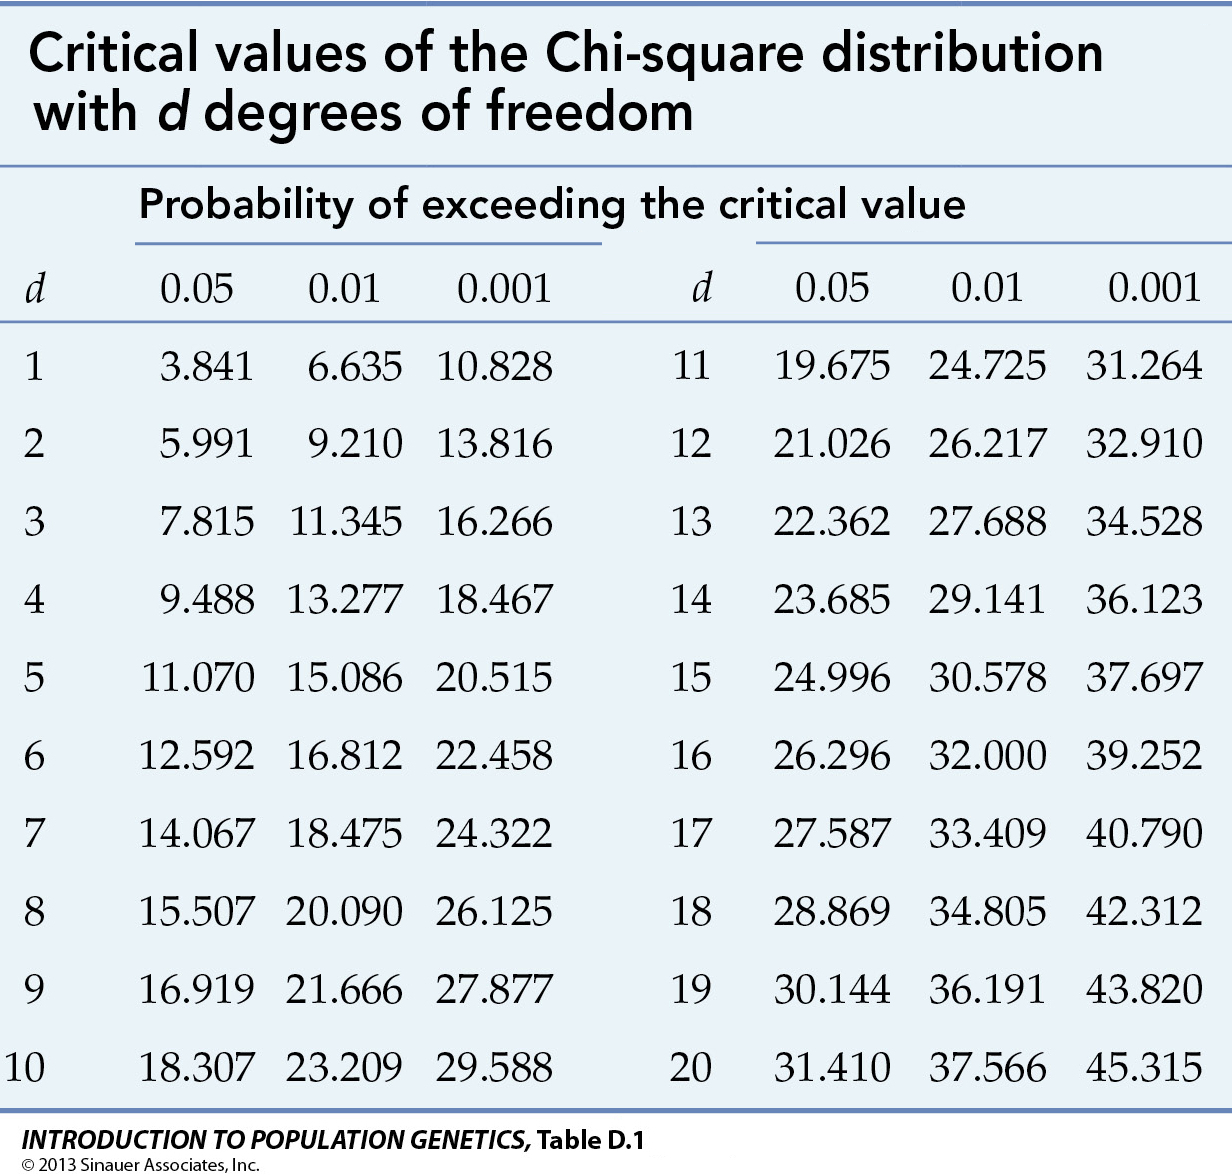

In [29]:
from IPython import display

display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

In [45]:
corr_df_model = data.select_dtypes(exclude=[np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

Empty DataFrame
Columns: []
Index: []

In [108]:
corr_mat = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

In [109]:
print(corr_mat)

                         age    gender   country  education      role  \
age                 1.000000  0.006567  0.012966   0.001047 -0.009051   
gender              0.006567  1.000000 -0.006631   0.019336  0.021496   
country             0.012966 -0.006631  1.000000   0.112382  0.001089   
education           0.001047  0.019336  0.112382   1.000000 -0.023913   
role               -0.009051  0.021496  0.001089  -0.023913  1.000000   
experience_prog    -0.002292  0.010951 -0.031153  -0.024197  0.014723   
programming_lang_c  0.001060  0.020951 -0.007185   0.022743 -0.039478   
experience_ml       0.021417 -0.037039  0.032790   0.009706  0.050496   
industry            0.005511 -0.019415  0.058009  -0.019545  0.057506   
company_size        0.002011  0.009841  0.008486   0.000880  0.012529   
team_size          -0.009791  0.010309 -0.034435  -0.022322 -0.004681   
salary             -0.007882 -0.055765  0.090056   0.028865 -0.038838   
country_group       0.036122  0.016903  0.409678   

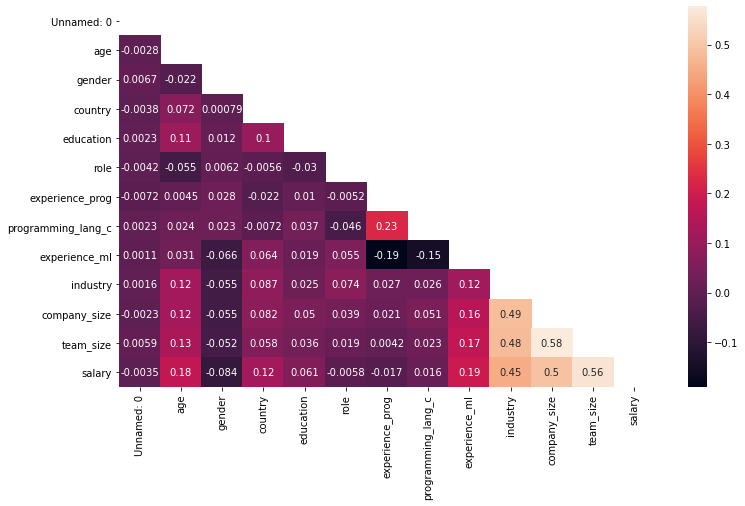

In [52]:
mask = np.zeros_like(corr_mat)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap((corr_mat), mask=mask, annot=True)
plt.show()